# EDA

In [1]:
%matplotlib inline

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import openpyxl
import scipy.stats as stats

In [3]:
import sys

sys.path.insert(0, '../modules/')

from hrd import HRD

In [294]:
def find_outliers(data, column_name):
    column_data = data.loc[:, column_name]
    lower_bound = column_data.quantile(0.25) - 1.5 * stats.iqr(column_data)
    upper_bound = column_data.quantile(0.75) + 1.5 * stats.iqr(column_data)
    
    return data[(column_data > upper_bound) | (column_data < lower_bound)]

## Space & Time dataset

In [4]:
seg_reports_path_space_and_time = '../datasets/SpaceAndTime/Segmental_reports/'
vcfs_path_space_and_time = '../datasets/SpaceAndTime/VCFs/'

samples_space_and_time = [
    {
        'Segmental report': 'P1.346403.Oxford/P1.346403.WES.10487.LungMET_events.txt',
        'VCF': 'Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.Source.vcf.gz',
        'Sample name': 'P29.346403.10487.MET'
    },
    {
        'Segmental report': 'P1.346403.Oxford/P1.346403.WES.9135.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.Source.vcf.gz',
        'Sample name': 'P29.346403.9135.PRE'
    },
    
    
    
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WES.20538.REC1_events.txt',
        'VCF': None,
        'Sample name': None # P62.631450.22059.NORM ?? zrejme nemá vzorku vo vcf
    },
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WGS.16963.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.Source.vcf.gz',
        'Sample name': 'P62.631450.16963.PRE'
    },
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WGS.22427.REC2_events.txt',
        'VCF': 'Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.Source.vcf.gz',
        'Sample name': 'P62.631450.22427.REC2'
    },
    
    
    
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.22726.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.22726.PRE'
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.24678.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.24678.POST'
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.25771.MET1a_events.txt',
        'VCF': None,
        'Sample name': None # P71.668392.24679.POST ?? zrejme nie
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.25899.MET2a_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.25900.MET2' # ?? zrejme ok
    },
    
    
    
    {
        'Segmental report': 'P4.737383.Oxford/P4.737383.WES.27135.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Source.vcf.gz',
        'Sample name': 'P80.737383.27135.POST'
    },
    {
        'Segmental report': 'P4.737383.Oxford/P4.737383.WES.28519.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Source.vcf.gz',
        'Sample name': 'P80.737383.28519.MET2'
    },
    
    
    
    {
        'Segmental report': 'P5/P5.670176.WGS.19835.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P5.670176/P5.670176.WGS.HF.Source.vcf.gz',
        'Sample name': 'P72.670176.19835.PRE'
    },
    {
        'Segmental report': 'P5/P5.670176.WGS.20135.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P5.670176/P5.670176.WGS.HF.Source.vcf.gz',
        'Sample name': 'P72.670176.20135.POST'
    },
    
    
    
    {
        'Segmental report': 'P6.Inform/I062.007.WGS.Pre_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P6.Inform/I062.007.WGS.Tumor_events.txt',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met4'
    },
    {
        'Segmental report': 'P6.Inform/I062.015.WGS.Tumor_events.txt',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met5'
    },
#     {
#         'Segmental report': 'P6.Inform/I062.022.WGS.Tumor_events.txt',
#         'VCF': 'P6/P06.WGS.raw.vcf.gz',
#         'Sample name': '' # zatial nemam
#     },
    {
        'Segmental report': 'P6.Inform/I062.033.WGS.Tumor_events.txt',
        'Segmental report header': False,
        'Segmental report sample name': 'P6.Rec7',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met7'
    },
    
    
    
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.10208.MET3_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.10208.MET3'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.7026.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.7026.PRE'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.8785.MET1_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.8785.MET1'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.9064.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.9064.MET2'
    },
    
    
    
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.MET_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.8046.MET'
    },
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.7202.PRE' # ?? zrejme OK
    },
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.REC_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.8290.REC' # ?? zrejme OK
    },
    
    
    
    {
        'Segmental report': 'P9.563259/P11.563259.WGS.13844.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P11.563259/P11.563259.WGS.HF.Source.vcf.gz',
        'Sample name': 'P.54.563259.13844.PRE'
    },
    {
        'Segmental report': 'P9.563259/P11.563259.WGS.14606.MET_events.txt',
        'VCF': 'Variants_WGS_HF_P11.563259/P11.563259.WGS.HF.Source.vcf.gz',
        'Sample name': 'P.54.563259.14606.MET'
    },
    
    
    
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.19245.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.19245.POST'
    },
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.21013.MET1.1_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.21013.MET1.1'
    },
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.2108.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.21018.MET2' # ?? zrejme ok
    },
    
    
    
    {
        'Segmental report': 'P11.182619/P9.182619.WGS.4290.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P9.182619/P9.182619.WGS.HF.Source.vcf.gz',
        'Sample name': 'P14.182619.4290.PRE'
    },
    {
        'Segmental report': 'P11.182619/P9.182619.WGS.5301.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P9.182619/P9.182619.WGS.HF.Source.vcf.gz',
        'Sample name': 'P14.182619.5301.REC'
    },
    
    
    
    {
        'Segmental report': 'P12.476409/P13.476409.WGS.11123.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P13.476409/P13.476409.WGS.HF.Source.vcf.gz',
        'Sample name': 'P42.476409.11123.PRE'
    },
    {
        'Segmental report': 'P12.476409/P13.476409.WGS.11259.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P13.476409/P13.476409.WGS.HF.Source.vcf.gz',
        'Sample name': 'P42.476409.11259.POST'
    }
]

In [5]:
def results_to_df(samples):
    results = pd.DataFrame(samples)
    results = pd.concat([results, results['LST'].apply(pd.Series)], axis=1)
    if 'Segmental report header' in results.columns:
        results.drop(columns=['Segmental report header', 'Segmental report sample name'], inplace=True)
        
    results.drop(columns=['LST'], inplace=True)

    return results

In [6]:
def run_hrd(samples, seg_reports_path, vcfs_path):
    for sample in samples:
        print(sample['Segmental report'])
        
        seg_relative_path = seg_reports_path + sample['Segmental report']
        vcf_relative_path = None
        if not sample['VCF'] is None:
            vcf_relative_path = vcfs_path + sample['VCF']

        hrd_test = None
        if 'Segmental report header' in sample and sample['Segmental report header'] == False:
            hrd_test = HRD(seg_relative_path, seg_report_file_with_header=False, seg_report_sample_name=sample['Segmental report sample name'], \
                           vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name']) 
        else:
            hrd_test = HRD(seg_relative_path, vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name'])        

        sample['LST'], sample['DNA index'] = hrd_test.test_lst()
        sample['TAI'] = hrd_test.test_tai()
        sample['LOH'] = hrd_test.test_loh()
        
    return results_to_df(samples)

In [7]:
results_space_and_time = run_hrd(samples_space_and_time, seg_reports_path_space_and_time, vcfs_path_space_and_time)

results_space_and_time

P1.346403.Oxford/P1.346403.WES.10487.LungMET_events.txt
P1.346403.Oxford/P1.346403.WES.9135.PRE_events.txt
P2.631450.Oxford/P2.631450.WES.20538.REC1_events.txt
P2.631450.Oxford/P2.631450.WGS.16963.PRE_events.txt
P2.631450.Oxford/P2.631450.WGS.22427.REC2_events.txt
P3.668392.Oxford/P3.668392.WGS.22726.PRE_events.txt
P3.668392.Oxford/P3.668392.WGS.24678.POST_events.txt
P3.668392.Oxford/P3.668392.WGS.25771.MET1a_events.txt
P3.668392.Oxford/P3.668392.WGS.25899.MET2a_events.txt
P4.737383.Oxford/P4.737383.WES.27135.POST_events.txt
P4.737383.Oxford/P4.737383.WES.28519.MET2_events.txt
P5/P5.670176.WGS.19835.PRE_events.txt
P5/P5.670176.WGS.20135.POST_events.txt
P6.Inform/I062.007.WGS.Pre_events.txt
P6.Inform/I062.007.WGS.Tumor_events.txt
P6.Inform/I062.015.WGS.Tumor_events.txt
P6.Inform/I062.033.WGS.Tumor_events.txt
P7.268947/P10.268947.WGS.10208.MET3_events.txt
P7.268947/P10.268947.WGS.7026.PRE_events.txt
P7.268947/P10.268947.WGS.8785.MET1_events.txt
P7.268947/P10.268947.WGS.9064.MET2_events.t

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,None,None,1.021656,14,18,126,86,57,51,39,34,24,20,16
3,P2.631450.Oxford/P2.631450.WGS.16963.PRE_event...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.16963.PRE,0.962429,11,14,33,26,21,17,14,9,7,7,5
4,P2.631450.Oxford/P2.631450.WGS.22427.REC2_even...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.22427.REC2,0.965883,10,14,34,29,25,22,22,19,16,14,13
5,P3.668392.Oxford/P3.668392.WGS.22726.PRE_event...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.22726.PRE,1.052132,14,15,13,11,10,10,8,7,7,7,6
6,P3.668392.Oxford/P3.668392.WGS.24678.POST_even...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.24678.POST,1.057139,13,16,8,8,8,8,8,7,7,7,7
7,P3.668392.Oxford/P3.668392.WGS.25771.MET1a_eve...,None,None,1.046373,12,17,9,8,8,8,8,7,7,7,7
8,P3.668392.Oxford/P3.668392.WGS.25899.MET2a_eve...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.25900.MET2,1.071727,9,12,8,8,8,8,8,7,7,7,7
9,P4.737383.Oxford/P4.737383.WES.27135.POST_even...,Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Sou...,P80.737383.27135.POST,1.049255,12,15,30,23,22,15,15,13,11,9,7


In [8]:
pd.set_option('display.max_columns', 1000)

In [9]:
results_space_and_time.to_excel("../datasets/hrd_results_S&T.xlsx")

In [10]:
results_space_and_time = pd.read_excel("../datasets/hrd_results_S&T.xlsx", index_col=0) 

results_space_and_time

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16
3,P2.631450.Oxford/P2.631450.WGS.16963.PRE_event...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.16963.PRE,0.962429,11,14,33,26,21,17,14,9,7,7,5
4,P2.631450.Oxford/P2.631450.WGS.22427.REC2_even...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.22427.REC2,0.965883,10,14,34,29,25,22,22,19,16,14,13
5,P3.668392.Oxford/P3.668392.WGS.22726.PRE_event...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.22726.PRE,1.052132,14,15,13,11,10,10,8,7,7,7,6
6,P3.668392.Oxford/P3.668392.WGS.24678.POST_even...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.24678.POST,1.057139,13,16,8,8,8,8,8,7,7,7,7
7,P3.668392.Oxford/P3.668392.WGS.25771.MET1a_eve...,NaN,NaN,1.046373,12,17,9,8,8,8,8,7,7,7,7
8,P3.668392.Oxford/P3.668392.WGS.25899.MET2a_eve...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.25900.MET2,1.071727,9,12,8,8,8,8,8,7,7,7,7
9,P4.737383.Oxford/P4.737383.WES.27135.POST_even...,Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Sou...,P80.737383.27135.POST,1.049255,12,15,30,23,22,15,15,13,11,9,7


In [11]:
results_space_and_time.describe()

,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.004405,9.454545,8.454545,42.636364,33.060606,26.969697,22.818182,19.636364,16.393939,14.090909,12.606061,11.303030
std,0.075864,11.763532,5.640761,31.132598,23.329085,17.178265,14.218066,11.488631,9.804143,8.538017,7.717429,7.182813
min,0.836970,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.970142,4.000000,5.000000,14.000000,13.000000,10.000000,10.000000,8.000000,8.000000,7.000000,7.000000,6.000000
50%,1.017886,6.000000,7.000000,35.000000,29.000000,25.000000,20.000000,17.000000,15.000000,13.000000,11.000000,10.000000
75%,1.049255,11.000000,14.000000,62.000000,54.000000,39.000000,32.000000,28.000000,24.000000,21.000000,18.000000,17.000000
max,1.144981,62.000000,22.000000,126.000000,86.000000,60.000000,51.000000,40.000000,35.000000,32.000000,31.000000,29.000000


## Analýza jednotlivých atribútov

### TAI

In [12]:
results_space_and_time['TAI'].mean()

9.454545454545455

In [13]:
results_space_and_time['TAI'].median()

6.0

In [14]:
results_space_and_time['TAI'].skew()

3.4691909002048757

In [15]:
results_space_and_time['TAI'].kurtosis()

13.485944841703605

<AxesSubplot:xlabel='TAI'>

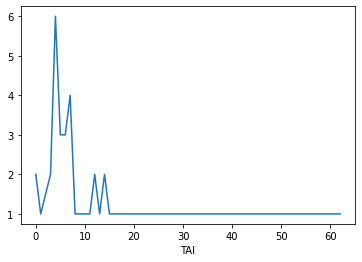

In [16]:
results_space_and_time.groupby('TAI').size().plot()

<AxesSubplot:xlabel='TAI', ylabel='Count'>

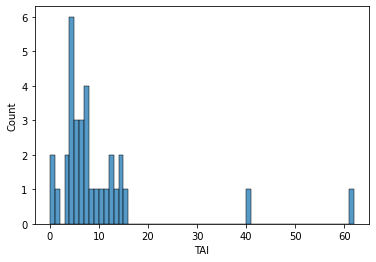

In [17]:
sns.histplot(results_space_and_time['TAI'], binwidth=1)

Môžeme vidieť že distribúcia hodnôt TAI je naklonená doľava, čo hovoria aj miery skewness a kurtosis

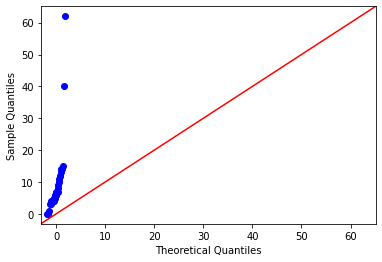

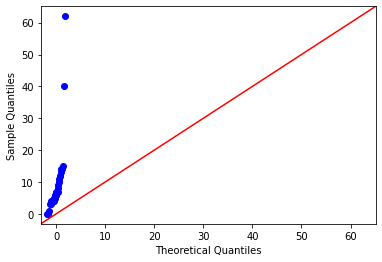

In [18]:
sm.qqplot(results_space_and_time['TAI'], line='45')

Šikmosť smerom vľavo možno vyčítať aj z qq-plotu.

<AxesSubplot:xlabel='TAI'>

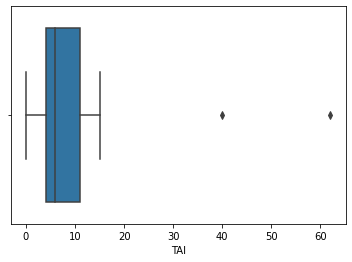

In [19]:
sns.boxplot(x=results_space_and_time['TAI'])

Medzi hodnotami TAI sa nachádzajú 2 veľmi vychýlené hodnoty. Hodnoty sa pohybujú v intervale 0 až cca 15.

In [296]:
find_outliers(results_space_and_time, 'TAI')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5,67,71,75,77
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9,71,73,73,75


Vidíme, že obidva outliere sú vzorky z pacienta 1

### LOH

In [20]:
results_space_and_time['LOH'].mean()

8.454545454545455

In [21]:
results_space_and_time['LOH'].median()

7.0

In [22]:
results_space_and_time['LOH'].skew()

0.6345354523266026

In [23]:
results_space_and_time['LOH'].kurtosis()

-0.5104935615536537

<AxesSubplot:xlabel='LOH'>

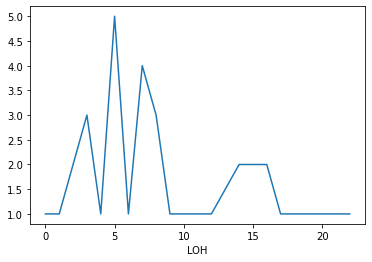

In [24]:
results_space_and_time.groupby('LOH').size().plot()

<AxesSubplot:xlabel='LOH', ylabel='Count'>

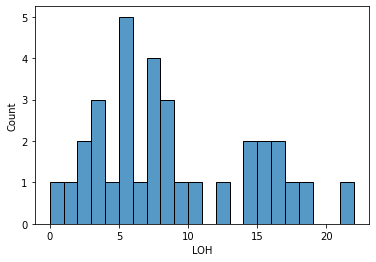

In [25]:
sns.histplot(results_space_and_time['LOH'], binwidth=1)

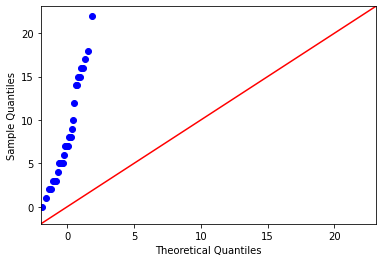

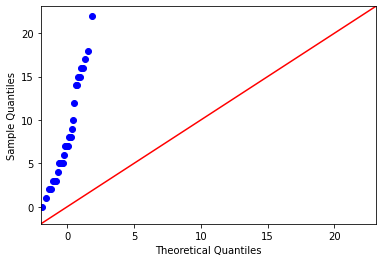

In [26]:
sm.qqplot(results_space_and_time['LOH'], line='45')

<AxesSubplot:xlabel='LOH'>

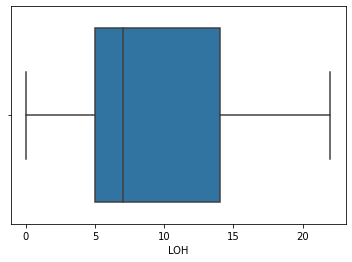

In [27]:
sns.boxplot(x=results_space_and_time['LOH'])

Na grafoch možno vidieť, že LOH nadobúdalo veľmi malé hodnoty väčšinou 0 a 1, iba tri vzorky mali väčšie hodnoty

### LST

#### LST_11Mb

In [28]:
results_space_and_time['LST_11Mb'].mean()

11.303030303030303

In [29]:
results_space_and_time['LST_11Mb'].median()

10.0

In [30]:
results_space_and_time['LST_11Mb'].skew()

0.6400594371078407

In [31]:
results_space_and_time['LST_11Mb'].kurtosis()

-0.1848897278962358

<AxesSubplot:xlabel='LST_11Mb'>

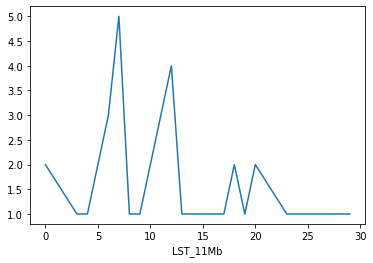

In [32]:
results_space_and_time.groupby('LST_11Mb').size().plot()

<AxesSubplot:xlabel='LST_11Mb', ylabel='Count'>

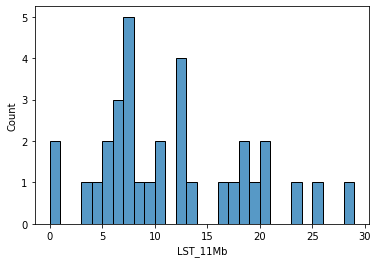

In [33]:
sns.histplot(results_space_and_time['LST_11Mb'], binwidth=1)

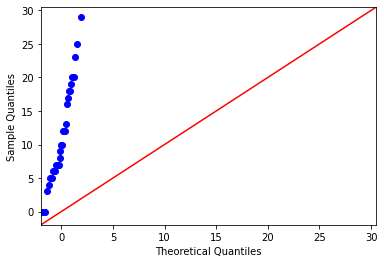

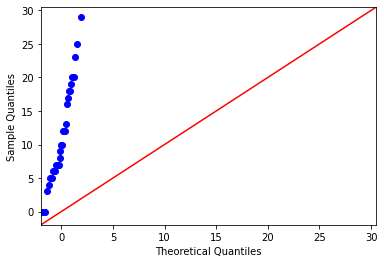

In [34]:
sm.qqplot(results_space_and_time['LST_11Mb'], line='45')

<AxesSubplot:xlabel='LST_11Mb'>

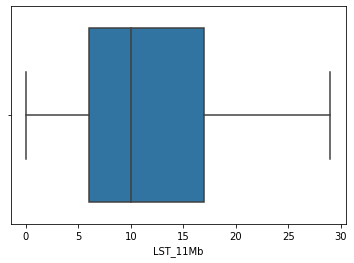

In [35]:
sns.boxplot(x=results_space_and_time['LST_11Mb'])

#### LST_10Mb

In [36]:
results_space_and_time['LST_10Mb'].mean()

12.606060606060606

In [37]:
results_space_and_time['LST_10Mb'].median()

11.0

In [38]:
results_space_and_time['LST_10Mb'].skew()

0.595164164432075

In [39]:
results_space_and_time['LST_10Mb'].kurtosis()

-0.31848800690152546

<AxesSubplot:xlabel='LST_10Mb'>

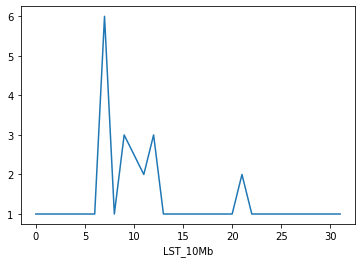

In [40]:
results_space_and_time.groupby('LST_10Mb').size().plot()

<AxesSubplot:xlabel='LST_10Mb', ylabel='Count'>

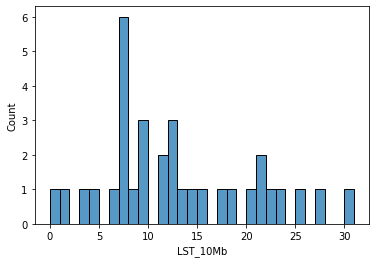

In [41]:
sns.histplot(results_space_and_time['LST_10Mb'], binwidth=1)

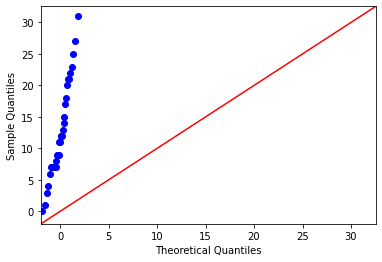

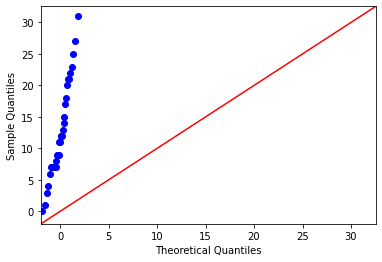

In [42]:
sm.qqplot(results_space_and_time['LST_10Mb'], line='45')

<AxesSubplot:xlabel='LST_10Mb'>

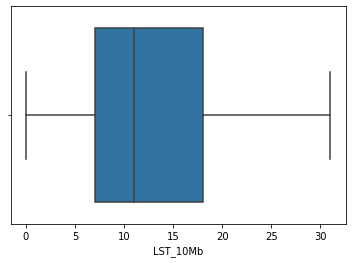

In [43]:
sns.boxplot(x=results_space_and_time['LST_10Mb'])

#### LST 9Mb

In [44]:
results_space_and_time['LST_9Mb'].mean()

14.090909090909092

In [45]:
results_space_and_time['LST_9Mb'].median()

13.0

In [46]:
results_space_and_time['LST_9Mb'].skew()

0.36412915181325256

In [47]:
results_space_and_time['LST_9Mb'].kurtosis()

-0.8321256113635842

<AxesSubplot:xlabel='LST_9Mb'>

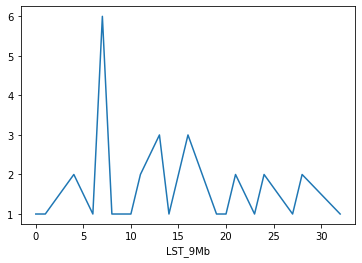

In [48]:
results_space_and_time.groupby('LST_9Mb').size().plot()

<AxesSubplot:xlabel='LST_9Mb', ylabel='Count'>

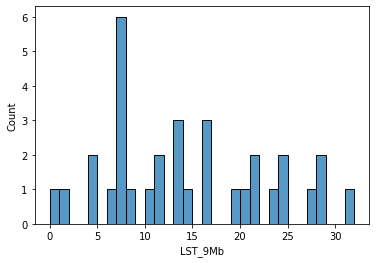

In [49]:
sns.histplot(results_space_and_time['LST_9Mb'], binwidth=1)

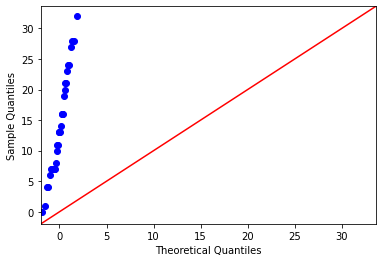

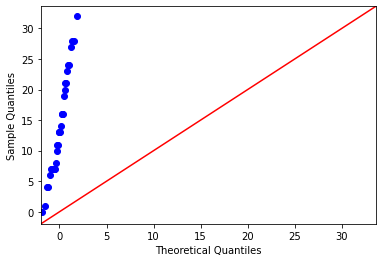

In [50]:
sm.qqplot(results_space_and_time['LST_9Mb'], line='45')

<AxesSubplot:xlabel='LST_9Mb'>

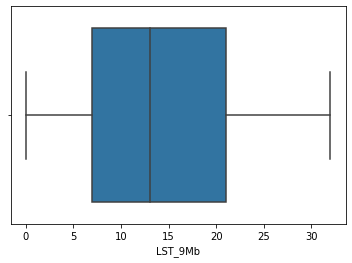

In [51]:
sns.boxplot(x=results_space_and_time['LST_9Mb'])

#### LST 8Mb

In [52]:
results_space_and_time['LST_8Mb'].mean()

16.393939393939394

In [53]:
results_space_and_time['LST_8Mb'].median()

15.0

In [54]:
results_space_and_time['LST_8Mb'].skew()

0.39542423375121843

In [55]:
results_space_and_time['LST_8Mb'].kurtosis()

-0.8893499177087181

<AxesSubplot:xlabel='LST_8Mb'>

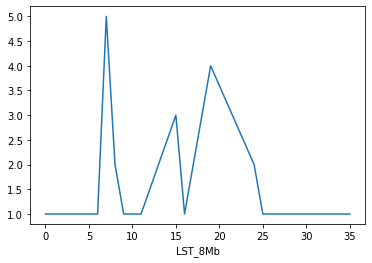

In [56]:
results_space_and_time.groupby('LST_8Mb').size().plot()

<AxesSubplot:xlabel='LST_8Mb', ylabel='Count'>

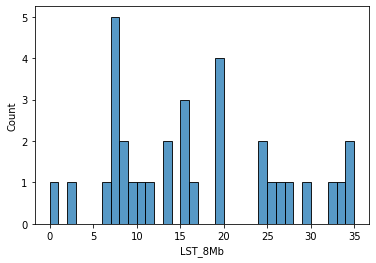

In [57]:
sns.histplot(results_space_and_time['LST_8Mb'], binwidth=1)

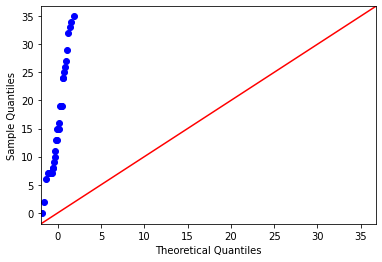

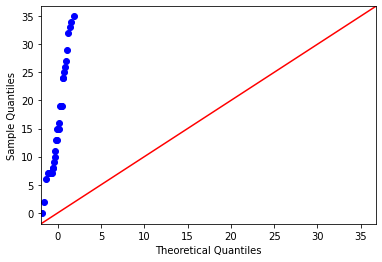

In [58]:
sm.qqplot(results_space_and_time['LST_8Mb'], line='45')

<AxesSubplot:xlabel='LST_8Mb'>

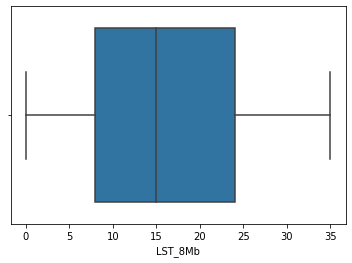

In [59]:
sns.boxplot(x=results_space_and_time['LST_8Mb'])

#### LST 7Mb

In [60]:
results_space_and_time['LST_7Mb'].mean()

19.636363636363637

In [61]:
results_space_and_time['LST_7Mb'].median()

17.0

In [62]:
results_space_and_time['LST_7Mb'].skew()

0.3054033652109363

In [63]:
results_space_and_time['LST_7Mb'].kurtosis()

-1.0376632912796353

<AxesSubplot:xlabel='LST_7Mb'>

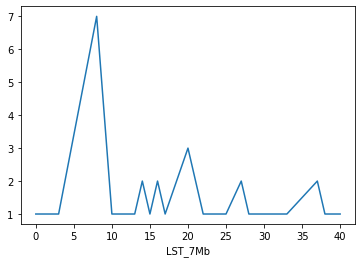

In [64]:
results_space_and_time.groupby('LST_7Mb').size().plot()

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

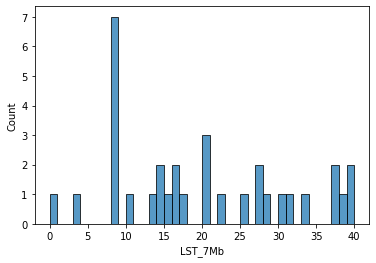

In [65]:
sns.histplot(results_space_and_time['LST_7Mb'], binwidth=1)

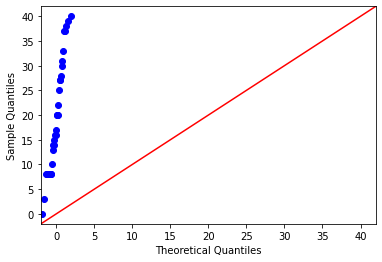

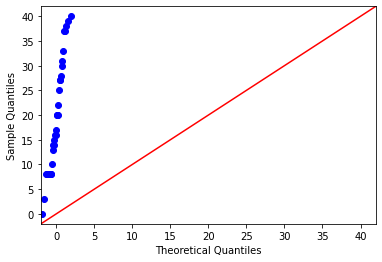

In [66]:
sm.qqplot(results_space_and_time['LST_7Mb'], line='45')

<AxesSubplot:xlabel='LST_7Mb'>

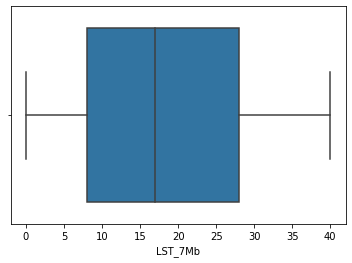

In [67]:
sns.boxplot(x=results_space_and_time['LST_7Mb'])

#### LST 6Mb

In [68]:
results_space_and_time['LST_6Mb'].mean()

22.818181818181817

In [69]:
results_space_and_time['LST_6Mb'].median()

20.0

In [70]:
results_space_and_time['LST_6Mb'].skew()

0.5140986348716319

In [71]:
results_space_and_time['LST_6Mb'].kurtosis()

-0.8192892525661719

<AxesSubplot:xlabel='LST_6Mb'>

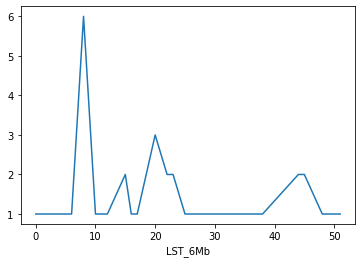

In [72]:
results_space_and_time.groupby('LST_6Mb').size().plot()

<AxesSubplot:xlabel='LST_6Mb', ylabel='Count'>

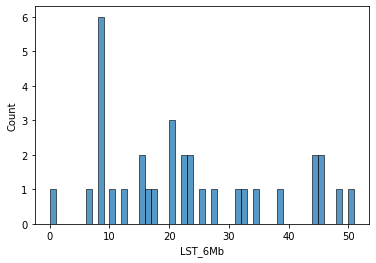

In [73]:
sns.histplot(results_space_and_time['LST_6Mb'], binwidth=1)

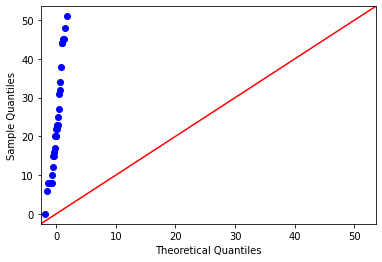

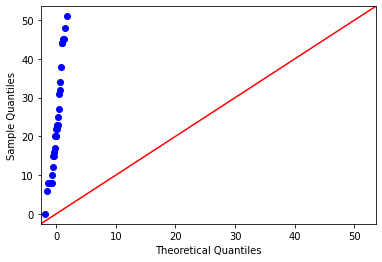

In [74]:
sm.qqplot(results_space_and_time['LST_6Mb'], line='45')

<AxesSubplot:xlabel='LST_6Mb'>

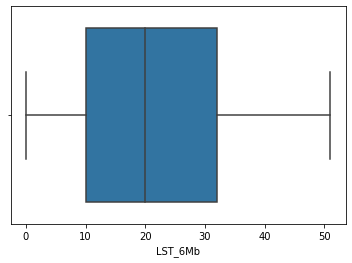

In [75]:
sns.boxplot(x=results_space_and_time['LST_6Mb'])

#### LST 5Mb

In [76]:
results_space_and_time['LST_5Mb'].mean()

26.96969696969697

In [77]:
results_space_and_time['LST_5Mb'].median()

25.0

In [78]:
results_space_and_time['LST_5Mb'].skew()

0.45575681227296694

In [79]:
results_space_and_time['LST_5Mb'].kurtosis()

-0.9042532111612709

<AxesSubplot:xlabel='LST_5Mb'>

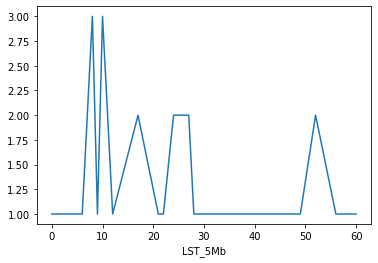

In [80]:
results_space_and_time.groupby('LST_5Mb').size().plot()

<AxesSubplot:xlabel='LST_5Mb', ylabel='Count'>

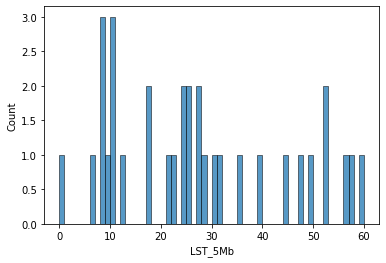

In [81]:
sns.histplot(results_space_and_time['LST_5Mb'], binwidth=1)

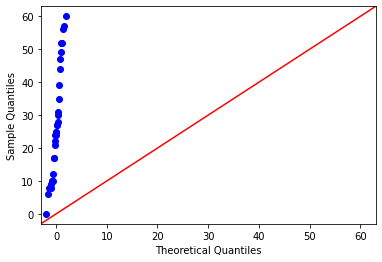

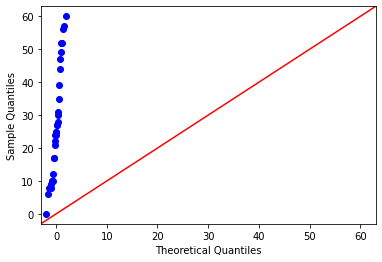

In [82]:
sm.qqplot(results_space_and_time['LST_5Mb'], line='45')

<AxesSubplot:xlabel='LST_5Mb'>

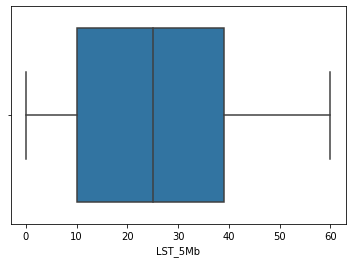

In [83]:
sns.boxplot(x=results_space_and_time['LST_5Mb'])

#### LST 4Mb

In [84]:
results_space_and_time['LST_4Mb'].mean()

33.06060606060606

In [85]:
results_space_and_time['LST_4Mb'].median()

29.0

In [86]:
results_space_and_time['LST_4Mb'].skew()

0.687708645785125

In [87]:
results_space_and_time['LST_4Mb'].kurtosis()

-0.46044072661372315

<AxesSubplot:xlabel='LST_4Mb'>

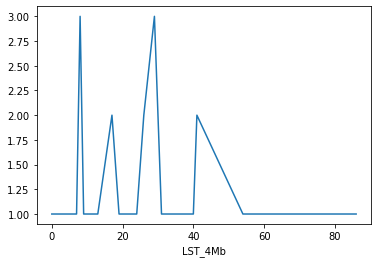

In [88]:
results_space_and_time.groupby('LST_4Mb').size().plot()

<AxesSubplot:xlabel='LST_4Mb', ylabel='Count'>

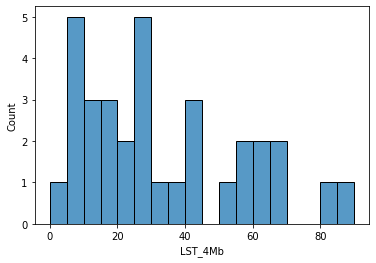

In [89]:
sns.histplot(results_space_and_time['LST_4Mb'], binwidth=5)

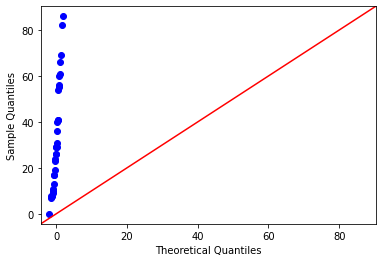

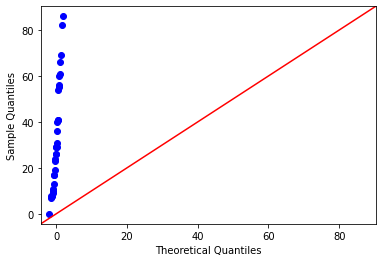

In [90]:
sm.qqplot(results_space_and_time['LST_4Mb'], line='45')

<AxesSubplot:xlabel='LST_4Mb'>

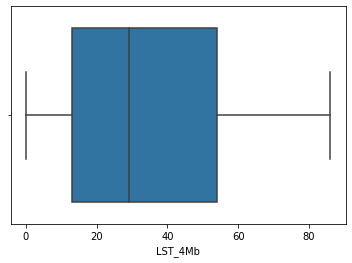

In [91]:
sns.boxplot(x=results_space_and_time['LST_4Mb'])

#### LST 3Mb

In [92]:
results_space_and_time['LST_3Mb'].mean()

42.63636363636363

In [93]:
results_space_and_time['LST_3Mb'].median()

35.0

In [94]:
results_space_and_time['LST_3Mb'].skew()

0.8633417561616822

In [95]:
results_space_and_time['LST_3Mb'].kurtosis()

0.07993838647223006

<AxesSubplot:xlabel='LST_3Mb'>

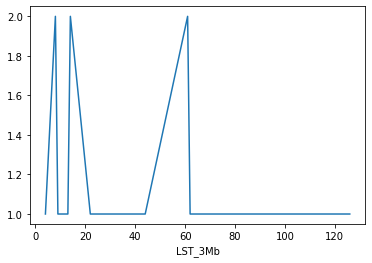

In [96]:
results_space_and_time.groupby('LST_3Mb').size().plot()

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

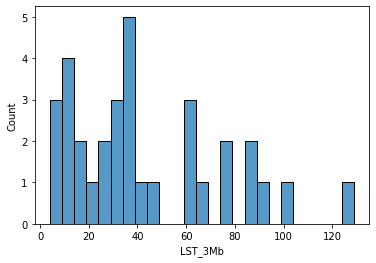

In [97]:
sns.histplot(results_space_and_time['LST_3Mb'], binwidth=5)

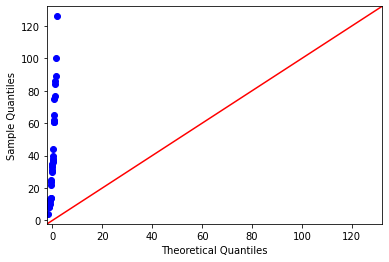

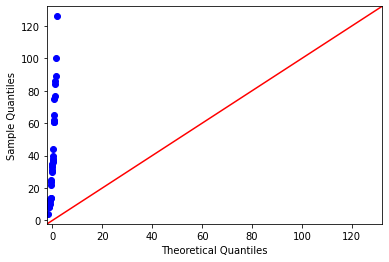

In [98]:
sm.qqplot(results_space_and_time['LST_3Mb'], line='45')

<AxesSubplot:xlabel='LST_3Mb'>

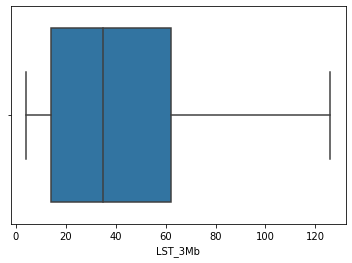

In [99]:
sns.boxplot(x=results_space_and_time['LST_3Mb'])

### HRD

#### HRD s LST_11Mb

In [100]:
results_space_and_time['HRD'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_11Mb']

In [101]:
results_space_and_time['HRD'].mean()

29.21212121212121

In [102]:
results_space_and_time['HRD'].median()

28.0

In [103]:
results_space_and_time['HRD'].skew()

1.3735838496209667

In [104]:
results_space_and_time['HRD'].kurtosis()

3.225057176116193

<AxesSubplot:xlabel='HRD'>

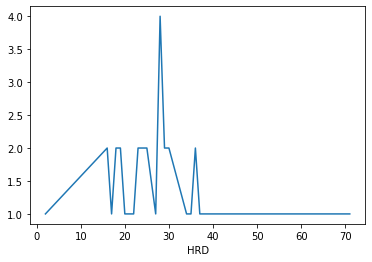

In [105]:
results_space_and_time.groupby('HRD').size().plot()

<AxesSubplot:xlabel='HRD', ylabel='Count'>

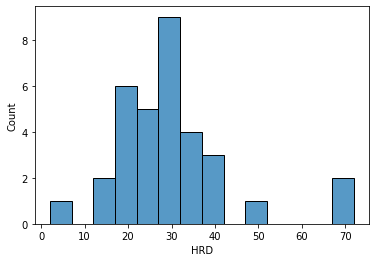

In [106]:
sns.histplot(results_space_and_time['HRD'], binwidth=5)

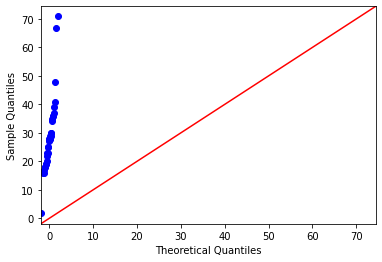

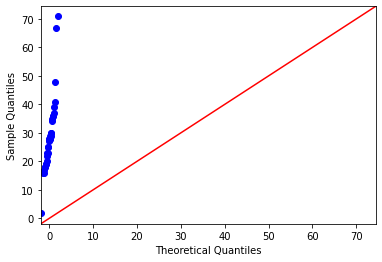

In [107]:
sm.qqplot(results_space_and_time['HRD'], line='45')

<AxesSubplot:xlabel='HRD'>

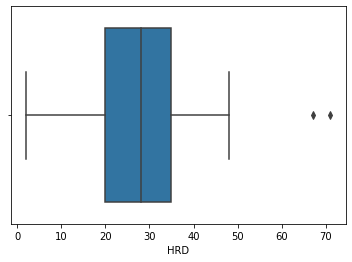

In [108]:
sns.boxplot(x=results_space_and_time['HRD'])

In [297]:
find_outliers(results_space_and_time, 'HRD')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5,67,71,75,77
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9,71,73,73,75


Outliere z pacienta 1 - vysoké hodnoty TAI

#### HRD s LST_10Mb

In [109]:
results_space_and_time['HRD_10'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_10Mb']

In [110]:
results_space_and_time['HRD_10'].mean()

30.515151515151516

In [111]:
results_space_and_time['HRD_10'].median()

28.0

In [112]:
results_space_and_time['HRD_10'].skew()

1.3791349665356951

In [113]:
results_space_and_time['HRD_10'].kurtosis()

3.0397326667781077

<AxesSubplot:xlabel='HRD_10'>

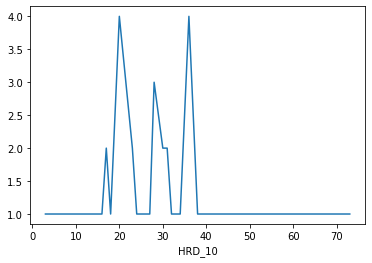

In [114]:
results_space_and_time.groupby('HRD_10').size().plot()

<AxesSubplot:xlabel='HRD_10', ylabel='Count'>

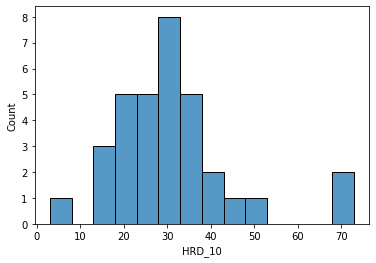

In [115]:
sns.histplot(results_space_and_time['HRD_10'], binwidth=5)

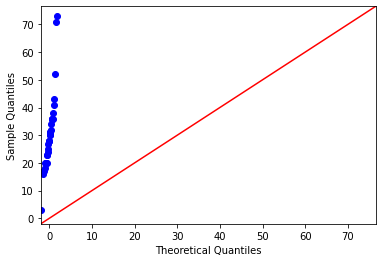

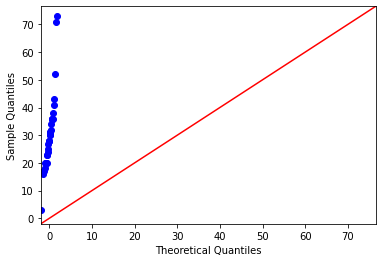

In [116]:
sm.qqplot(results_space_and_time['HRD_10'], line='45')

<AxesSubplot:xlabel='HRD_10'>

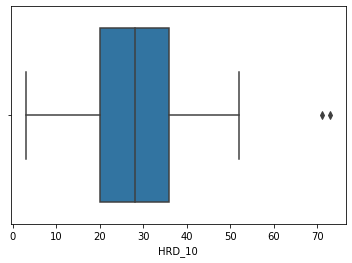

In [117]:
sns.boxplot(x=results_space_and_time['HRD_10'])

In [298]:
find_outliers(results_space_and_time, 'HRD_10')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5,67,71,75,77
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9,71,73,73,75


#### HRD s LST_9Mb

In [118]:
results_space_and_time['HRD_9'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_9Mb']

In [119]:
results_space_and_time['HRD_9'].mean()

32.0

In [120]:
results_space_and_time['HRD_9'].median()

31.0

In [121]:
results_space_and_time['HRD_9'].skew()

1.2571834317132653

In [122]:
results_space_and_time['HRD_9'].kurtosis()

2.677638132241005

<AxesSubplot:xlabel='HRD_9'>

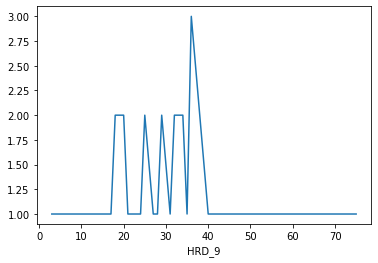

In [123]:
results_space_and_time.groupby('HRD_9').size().plot()

<AxesSubplot:xlabel='HRD_9', ylabel='Count'>

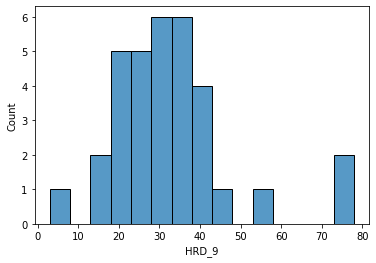

In [124]:
sns.histplot(results_space_and_time['HRD_9'], binwidth=5)

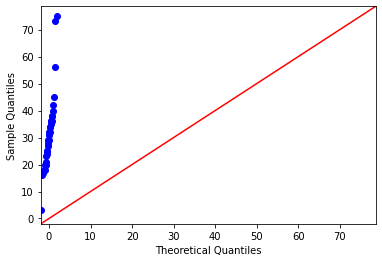

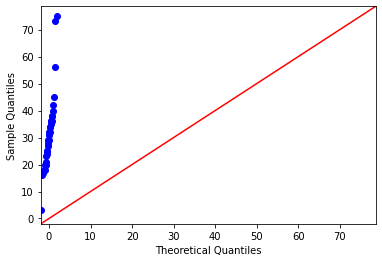

In [125]:
sm.qqplot(results_space_and_time['HRD_9'], line='45')

<AxesSubplot:xlabel='HRD_9'>

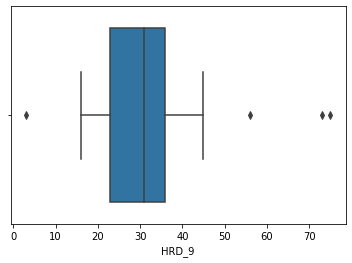

In [126]:
sns.boxplot(x=results_space_and_time['HRD_9'])

In [299]:
find_outliers(results_space_and_time, 'HRD_9')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5,67,71,75,77
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9,71,73,73,75
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16,48,52,56,66
13,P6.Inform/I062.007.WGS.Pre_events.txt,NaN,NaN,0.986621,0,2,10,7,6,6,3,2,1,1,0,2,3,3,4


#### HRD s LST_8Mb

In [127]:
results_space_and_time['HRD_8'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_8Mb']

In [128]:
results_space_and_time['HRD_8'].mean()

34.303030303030305

In [129]:
results_space_and_time['HRD_8'].median()

35.0

In [130]:
results_space_and_time['HRD_8'].skew()

1.1548807336955986

In [131]:
results_space_and_time['HRD_8'].kurtosis()

2.0305166169876485

<AxesSubplot:xlabel='HRD_8'>

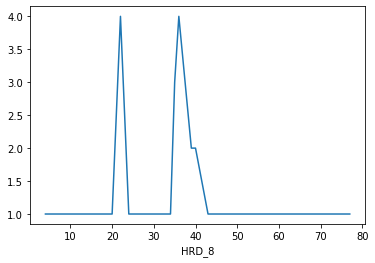

In [132]:
results_space_and_time.groupby('HRD_8').size().plot()

<AxesSubplot:xlabel='HRD_8', ylabel='Count'>

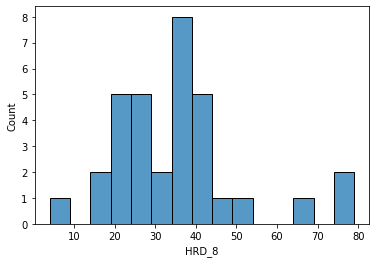

In [133]:
sns.histplot(results_space_and_time['HRD_8'], binwidth=5)

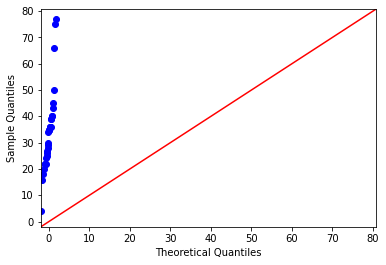

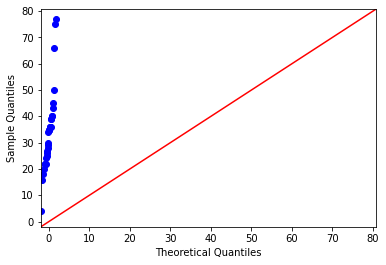

In [134]:
sm.qqplot(results_space_and_time['HRD_8'], line='45')

<AxesSubplot:xlabel='HRD_8'>

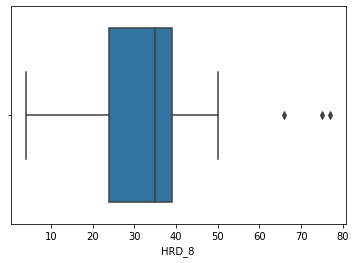

In [135]:
sns.boxplot(x=results_space_and_time['HRD_8'])

In [300]:
find_outliers(results_space_and_time, 'HRD_8')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,62,40,30,23,17,15,13,9,5,67,71,75,77
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,61,41,27,20,16,13,11,11,9,71,73,73,75
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16,48,52,56,66


### Párová analýza atribútov

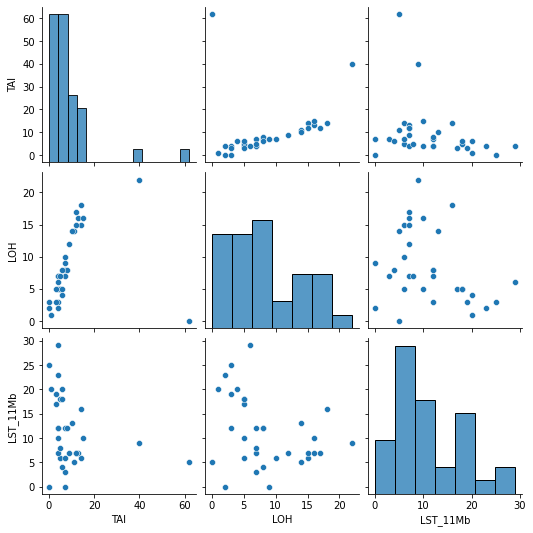

In [136]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_11Mb']])

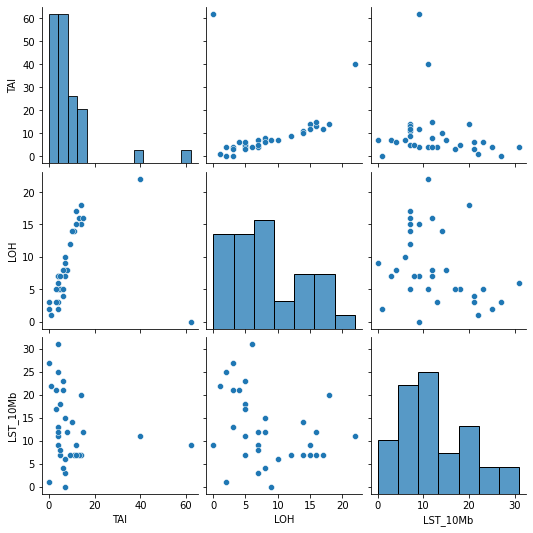

In [137]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_10Mb']])

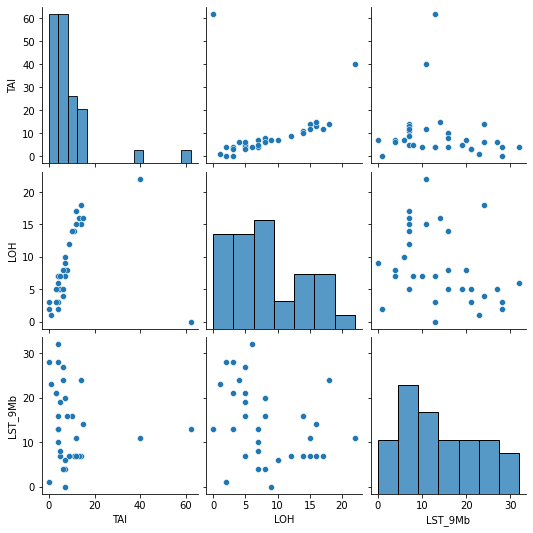

In [138]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_9Mb']])

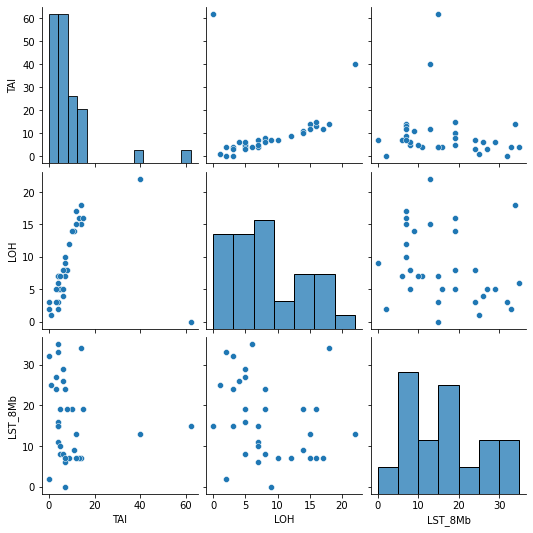

In [139]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_8Mb']])

<AxesSubplot:>

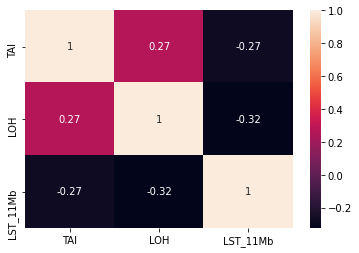

In [140]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_11Mb']].corr(), annot=True)

<AxesSubplot:>

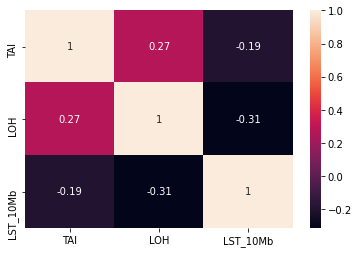

In [141]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_10Mb']].corr(), annot=True)

<AxesSubplot:>

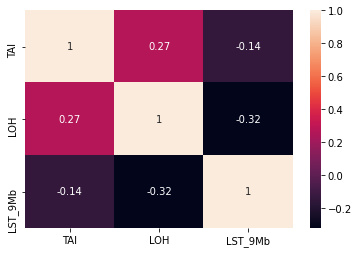

In [142]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_9Mb']].corr(), annot=True)

<AxesSubplot:>

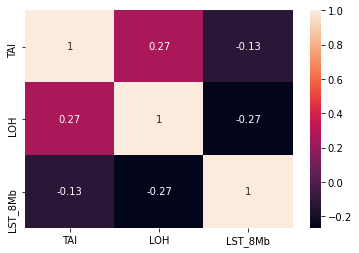

In [143]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_8Mb']].corr(), annot=True)

## INFORM dataset

In [144]:
seg_reports_path_inform = '../datasets/Inform/Segmental reports/'
vcfs_path_inform = '../datasets/Inform/VCFs/'

samples_inform = [
    {
        'Segmental report': 'P01/P1.I042.001.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P01/P1.I062.003.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P02/P2.MS.00F.WGS_events.txt',
        'VCF': 'P02/P02.MS_00F.WGS.Source.vcf.gz',
        'Sample name': 'MS_00F.T'
    },
    
    
    
    {
        'Segmental report': 'P03/P3.I062.007.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P03/P3.I062.015.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P03/P3.I062.022.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P03/P3.I062.033.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P04/P4.I042.002.WGS_events.txt',
        'VCF': 'P04/P04.I042_002.WGS.Source.vcf.gz',
        'Sample name': 'I042_002.T'
    },
    
    
    
    {
        'Segmental report': 'P05/P5.HA.00B.WGS_events.txt',
        'VCF': 'P05/P05.HA_00B.WGS.Source.vcf.gz',
        'Sample name': 'HA_00B.T'
    },
    
    
    
    {
        'Segmental report': 'P06/P6.HD.00J.WGS_events.txt',
        'VCF': 'P06/P06.HD_00J.WGS.HF.Source.vcf.gz',
        'Sample name': 'HD_00J.T'
    },
    
    
    
    {
        'Segmental report': 'P07/P7.MS.00A.WGS_events.txt',
        'VCF': 'P07/P07.MS_00A.WGS.Source.vcf.gz',
        'Sample name': 'MS_00A.T'
    },
    
    
    
    {
        'Segmental report': 'P08/P8.I022.002.WGS_events.txt',
        'VCF': 'P08/P08.I022_002.WGS.HF.Source.vcf.gz',
        'Sample name': 'I022_002.T'
    },
    
    
    
    {
        'Segmental report': 'P09/P9.I047.003.WGS_events.txt',
        'VCF': 'P09/P09.I047_003.WGS.HF.Source.vcf.gz',
        'Sample name': 'I047_003.T'
    },
    
    
    
    {
        'Segmental report': 'P10/P10.I023.005.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P11/P11.I036.005.WGS_events.txt',
        'VCF': 'P11/P11.I036_005.WGS.HF.Source.vcf.gz',
        'Sample name': 'I036_005.T'
    },
    
    
    
    {
        'Segmental report': 'P12/P12.I056.004.WGS_events.txt',
        'VCF': 'P12/P12.I056_004.WGS.HF.Source.vcf.gz',
        'Sample name': 'I056_004.T'
    },
    
    
    
    {
        'Segmental report': 'P13/P13.I022.017.WGS_events.txt',
        'VCF': 'P13/P13.I022_017.WGS.HF.Source.vcf.gz',
        'Sample name': 'I022_017.T'
    },
    
    
    
    {
        'Segmental report': 'P14/P14.I062.006.WES_events.txt',
        'VCF': 'P14/P14.I062.006.WGS.HF.Source.vcf.gz',
        'Sample name': 'I062.006.T'
    },
    
    
    
    {
        'Segmental report': 'P15/P15.I047.005.WGS_events.txt',
        'VCF': 'P15/P15.I047.005.WGS.raw.vcf.gz',
        'Sample name': 'I047_005.T'
    },
    
    
    
    {
        'Segmental report': 'P16/P16.I062.010.WGS_events.txt',
        'VCF': 'P16/P16.I062_010.WGS.HF.Source.vcf.gz',
        'Sample name': 'I062_010.T'
    },
    
    
    
    {
        'Segmental report': 'P17/P17.I062.020.WGS_events.txt',
        'VCF': 'P17/P17.I062.020.WGS.Source.vcf.gz',
        'Sample name': 'I062_020.T'
    },
    
    
    
    {
        'Segmental report': 'P18/P18.I062_021.WGS_events.txt',
        'VCF': 'P18/P18.I062.021.WGS.Source.vcf.gz',
        'Sample name': 'I0622_021.T'
    },
    
    
    
    {
        'Segmental report': 'P19/P19.I007.018.WGS_events.txt',
        'VCF': 'P19/P19.I007.018.WGS.Source.vcf.gz',
        'Sample name': 'I007_018.T'
    },
    
    
    
    {
        'Segmental report': 'P20/P20.I047.006.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P21/P21.I037.002.WGS_events.txt',
        'VCF': 'P21/P21.I037.002.WGS.Source.vcf.gz',
        'Sample name': 'I037_002_3M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P22/P22.I044.004.WGS_events.txt',
        'VCF': 'P22/P22.I044.004.WGS.Source.vcf.gz',
        'Sample name': 'I044_004_2M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P23/P23.I002.006.WGS_events.txt',
        'VCF': 'P23/P23.I002.006.WGS.Source.vcf.gz',
        'Sample name': 'I002_006_9M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P24/P24.I062.035.WGS_events.txt',
        'VCF': 'P24/P24.I062.035.WGS.Source.vcf.gz',
        'Sample name': 'I062_035_2M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P25/P25.I002.007.WGS_events.txt',
        'VCF': 'P25/P25.I002.007.WGS.HF.Source.vcf.gz',
        'Sample name': 'I002_007_9M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P26/P26.I042.009.WGS_events.txt',
        'VCF': 'P26/P26.I042.009.WGS.Source.vcf.gz',
        'Sample name': 'I042_009_1M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P27/P27.I047.007.WGS_events.txt',
        'VCF': 'P27/P27.I047.007.WGS.Source.vcf.gz',
        'Sample name': 'I047_007_2M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P28/P28.I057.002.WGS_events.txt',
        'VCF': 'P28/P28.I057.002.WGS.HF.Source.vcf.gz',
        'Sample name': 'I057_002_2T1_D1'
    },
    
    
    
    {
        'Segmental report': 'P29/P29.I024.021.WGS.nexus_export.txt',
        'VCF': 'P29/P29.I024.021.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'AS-258811-LR-37678'
    },
    
    
    
    {
        'Segmental report': 'P30/P30.I070.021.WGS.nexus_export.txt',
        'VCF': 'P30/P30.I070.021.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'AS-261727-LR-38150'
    },
    
    
    
    {
        'Segmental report': 'P31/P31.I015.008.WGS.nexus_export.txt',
        'VCF': 'P31/P31.I015.008.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'I015.008.Tumor'
    },
    
    
    
    {
        'Segmental report': 'P32/P32.I027.011.WGS.nexus_export.txt',
        'VCF': 'P32/P32.I027.011.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'I027.011.Tumor'
    },
    
    
    
    {
        'Segmental report': 'P33/P33.I047.011.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    {
        'Segmental report': 'P34/P34.I063.011.WGS.nexus_export.txt',
        'VCF': 'P34/P34.I063.011.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'I063.011.Tumor'
    },
    
    
    {
        'Segmental report': 'P35/P35.I013.017.WGS.nexus_export.txt',
        'VCF': 'P35/P35.I013.017.hisat2.WGS.raw.vcf.gz',
        'Sample name': 'P35.I013.017.WGS.T'
    },
    
    
    
    {
        'Segmental report': 'P36/P36.I014.018.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P37/P37.I018.023..WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P38/P38.I063.010.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P39/P39.I054.013.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P40/P40.I076.018.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    {
        'Segmental report': 'P41/P41.I018.019.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    }
]

In [145]:
results_inform = run_hrd(samples_inform, seg_reports_path_inform, vcfs_path_inform)

results_inform

P01/P1.I042.001.WGS_events.txt
P01/P1.I062.003.WGS_events.txt
P02/P2.MS.00F.WGS_events.txt
P03/P3.I062.007.WGS_events.txt
P03/P3.I062.015.WGS_events.txt
P03/P3.I062.022.WGS_events.txt
P03/P3.I062.033.WGS_events.txt
P04/P4.I042.002.WGS_events.txt
P05/P5.HA.00B.WGS_events.txt
P06/P6.HD.00J.WGS_events.txt
P07/P7.MS.00A.WGS_events.txt
P08/P8.I022.002.WGS_events.txt
P09/P9.I047.003.WGS_events.txt
P10/P10.I023.005.WGS_events.txt
P11/P11.I036.005.WGS_events.txt
P12/P12.I056.004.WGS_events.txt
P13/P13.I022.017.WGS_events.txt
P14/P14.I062.006.WES_events.txt
P15/P15.I047.005.WGS_events.txt
P16/P16.I062.010.WGS_events.txt
P17/P17.I062.020.WGS_events.txt
P18/P18.I062_021.WGS_events.txt
P19/P19.I007.018.WGS_events.txt
P20/P20.I047.006.WGS_events.txt
P21/P21.I037.002.WGS_events.txt
P22/P22.I044.004.WGS_events.txt
P23/P23.I002.006.WGS_events.txt
P24/P24.I062.035.WGS_events.txt
P25/P25.I002.007.WGS_events.txt
P26/P26.I042.009.WGS_events.txt
P27/P27.I047.007.WGS_events.txt
P28/P28.I057.002.WGS_events.t

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P01/P1.I042.001.WGS_events.txt,None,None,1.006962,0,0,31,25,21,18,16,14,12,9,4
1,P01/P1.I062.003.WGS_events.txt,None,None,1.030277,0,0,36,26,24,22,21,13,10,7,6
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,122,99,76,58,47,35,28,24,20
3,P03/P3.I062.007.WGS_events.txt,None,None,1.023299,0,0,36,22,18,17,16,11,9,7,4
4,P03/P3.I062.015.WGS_events.txt,None,None,1.045612,0,0,89,70,59,45,40,31,30,25,21
5,P03/P3.I062.022.WGS_events.txt,None,None,1.013319,0,0,180,138,106,91,76,63,46,38,31
6,P03/P3.I062.033.WGS_events.txt,None,None,1.048072,1,1,98,71,54,48,31,26,22,22,20
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,21,11,11,9,8,5,4,4,4
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,170,113,80,68,55,46,31,23,21
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,76,56,46,37,28,25,22,19,17


In [146]:
results_inform.to_excel("../datasets/hrd_results_inform.xlsx")

In [147]:
results_inform = pd.read_excel("../datasets/hrd_results_inform.xlsx", index_col=0) 

results_inform

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.006962,0,0,31,25,21,18,16,14,12,9,4
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.030277,0,0,36,26,24,22,21,13,10,7,6
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,122,99,76,58,47,35,28,24,20
3,P03/P3.I062.007.WGS_events.txt,NaN,NaN,1.023299,0,0,36,22,18,17,16,11,9,7,4
4,P03/P3.I062.015.WGS_events.txt,NaN,NaN,1.045612,0,0,89,70,59,45,40,31,30,25,21
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31
6,P03/P3.I062.033.WGS_events.txt,NaN,NaN,1.048072,1,1,98,71,54,48,31,26,22,22,20
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,21,11,11,9,8,5,4,4,4
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,170,113,80,68,55,46,31,23,21
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,76,56,46,37,28,25,22,19,17


In [148]:
results_inform.describe()

,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.033406,2.088889,1.511111,76.800000,57.733333,45.444444,36.555556,30.955556,25.666667,21.444444,18.200000,15.533333
std,0.062700,7.400314,4.003534,45.490558,33.594778,24.623119,19.615110,16.094826,13.800527,11.376922,9.497847,8.195342
min,0.915005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000028,0.000000,0.000000,44.000000,37.000000,33.000000,23.000000,21.000000,17.000000,12.000000,9.000000,9.000000
50%,1.037760,0.000000,0.000000,78.000000,55.000000,46.000000,36.000000,31.000000,26.000000,22.000000,21.000000,18.000000
75%,1.067438,0.000000,1.000000,98.000000,72.000000,59.000000,48.000000,41.000000,34.000000,30.000000,25.000000,21.000000
max,1.194626,48.000000,23.000000,180.000000,138.000000,106.000000,91.000000,76.000000,63.000000,46.000000,38.000000,31.000000


## Analýza jednotlivých atribútov

### TAI

In [149]:
results_inform['TAI'].mean()

2.088888888888889

In [150]:
results_inform['TAI'].median()

0.0

In [151]:
results_inform['TAI'].skew()

5.7214649359390535

In [152]:
results_inform['TAI'].kurtosis()

35.44809925551186

<AxesSubplot:xlabel='TAI'>

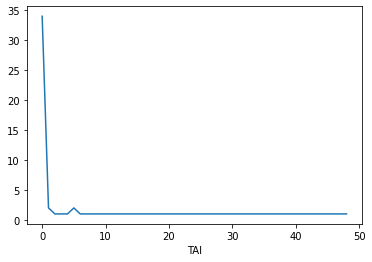

In [153]:
results_inform.groupby('TAI').size().plot()

<AxesSubplot:xlabel='TAI', ylabel='Count'>

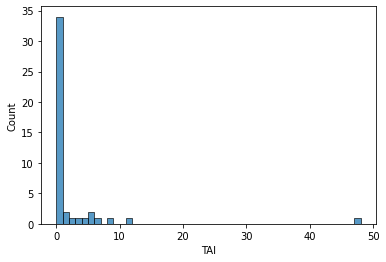

In [154]:
sns.histplot(results_inform['TAI'], binwidth=1)

Môžeme vidieť že distribúcia hodnôt TAI je naklonená doľava, čo hovoria aj miery skewness a kurtosis

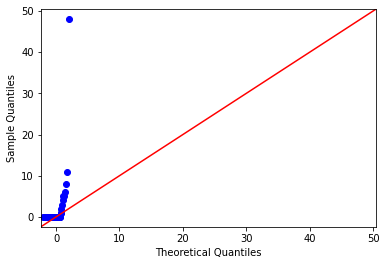

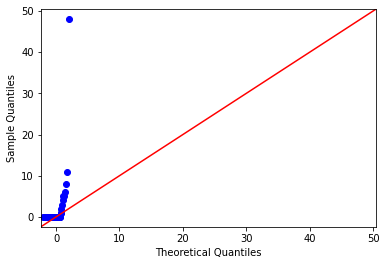

In [155]:
sm.qqplot(results_inform['TAI'], line='45')

Šikmosť smerom vľavo možno vyčítať aj z qq-plotu.

<AxesSubplot:xlabel='TAI'>

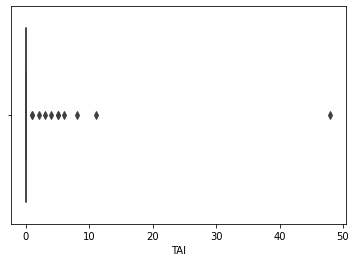

In [156]:
sns.boxplot(x=results_inform['TAI'])

In [301]:
find_outliers(results_inform, 'TAI')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
6,P03/P3.I062.033.WGS_events.txt,NaN,NaN,1.048072,1,1,98,71,54,48,31,26,22,22,20,22,24,24,28
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,144,114,79,63,52,47,39,29,23,94,100,110,118
22,P19/P19.I007.018.WGS_events.txt,P19/P19.I007.018.WGS.Source.vcf.gz,I007_018.T,0.945868,5,5,5,5,3,2,1,1,0,0,0,10,10,10,11
23,P20/P20.I047.006.WGS_events.txt,NaN,NaN,1.003549,8,8,5,4,4,4,3,2,2,2,2,18,18,18,18
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,84,67,58,51,43,39,36,32,29,38,41,45,48
25,P22/P22.I044.004.WGS_events.txt,P22/P22.I044.004.WGS.Source.vcf.gz,I044_004_2M1_D1,0.990309,4,5,53,45,40,32,31,28,27,25,23,32,34,36,37
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,0,0,0,0,0,0,0,0,0,12,12,12,12
28,P25/P25.I002.007.WGS_events.txt,P25/P25.I002.007.WGS.HF.Source.vcf.gz,I002_007_9M1_D1,1.069543,3,3,35,25,17,10,8,6,6,6,6,12,12,12,12
29,P26/P26.I042.009.WGS_events.txt,P26/P26.I042.009.WGS.Source.vcf.gz,I042_009_1M1_D1,1.194626,1,1,109,89,66,57,48,36,35,27,24,26,29,37,38
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,124,85,68,57,51,46,36,25,22,43,46,57,67


### LOH

In [157]:
results_inform['LOH'].mean()

1.511111111111111

In [158]:
results_inform['LOH'].median()

0.0

In [159]:
results_inform['LOH'].skew()

4.035466185528479

In [160]:
results_inform['LOH'].kurtosis()

19.204736233655733

<AxesSubplot:xlabel='LOH'>

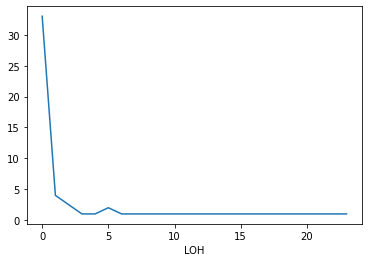

In [161]:
results_inform.groupby('LOH').size().plot()

<AxesSubplot:xlabel='LOH', ylabel='Count'>

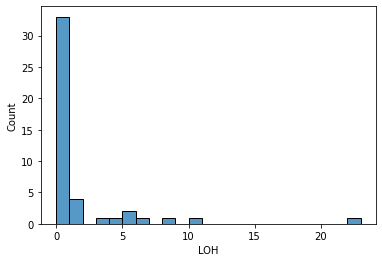

In [162]:
sns.histplot(results_inform['LOH'], binwidth=1)

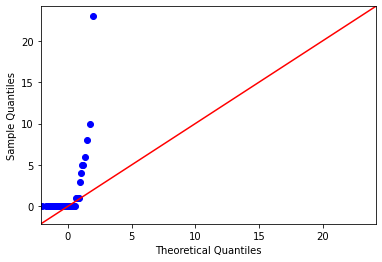

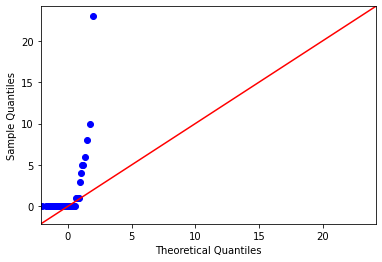

In [163]:
sm.qqplot(results_inform['LOH'], line='45')

<AxesSubplot:xlabel='LOH'>

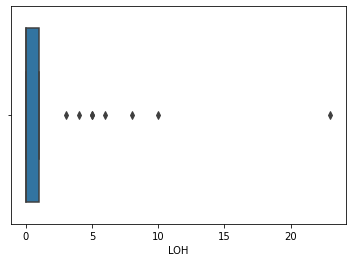

In [164]:
sns.boxplot(x=results_inform['LOH'])

In [302]:
find_outliers(results_inform, 'LOH')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,144,114,79,63,52,47,39,29,23,94,100,110,118
22,P19/P19.I007.018.WGS_events.txt,P19/P19.I007.018.WGS.Source.vcf.gz,I007_018.T,0.945868,5,5,5,5,3,2,1,1,0,0,0,10,10,10,11
23,P20/P20.I047.006.WGS_events.txt,NaN,NaN,1.003549,8,8,5,4,4,4,3,2,2,2,2,18,18,18,18
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,84,67,58,51,43,39,36,32,29,38,41,45,48
25,P22/P22.I044.004.WGS_events.txt,P22/P22.I044.004.WGS.Source.vcf.gz,I044_004_2M1_D1,0.990309,4,5,53,45,40,32,31,28,27,25,23,32,34,36,37
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,0,0,0,0,0,0,0,0,0,12,12,12,12
28,P25/P25.I002.007.WGS_events.txt,P25/P25.I002.007.WGS.HF.Source.vcf.gz,I002_007_9M1_D1,1.069543,3,3,35,25,17,10,8,6,6,6,6,12,12,12,12
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,124,85,68,57,51,46,36,25,22,43,46,57,67


### LST

#### LST_11Mb

In [165]:
results_inform['LST_11Mb'].mean()

15.533333333333333

In [166]:
results_inform['LST_11Mb'].median()

18.0

In [167]:
results_inform['LST_11Mb'].skew()

-0.3905003342352592

In [168]:
results_inform['LST_11Mb'].kurtosis()

-0.8723078352181997

<AxesSubplot:xlabel='LST_11Mb'>

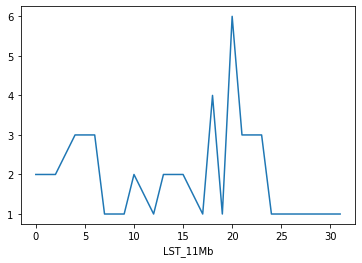

In [169]:
results_inform.groupby('LST_11Mb').size().plot()

<AxesSubplot:xlabel='LST_11Mb', ylabel='Count'>

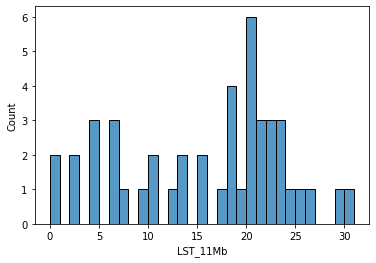

In [170]:
sns.histplot(results_inform['LST_11Mb'], binwidth=1)

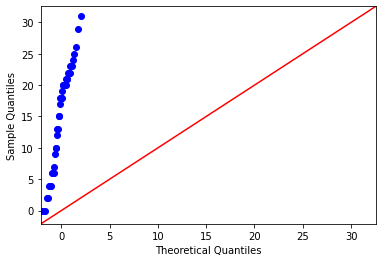

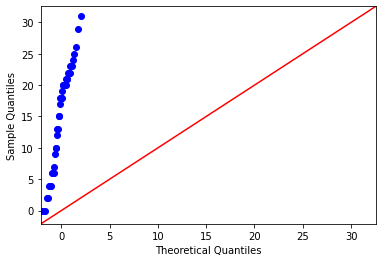

In [171]:
sm.qqplot(results_inform['LST_11Mb'], line='45')

<AxesSubplot:xlabel='LST_11Mb'>

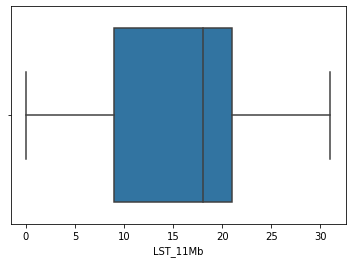

In [172]:
sns.boxplot(x=results_inform['LST_11Mb'])

#### LST_10Mb

In [173]:
results_inform['LST_10Mb'].mean()

18.2

In [174]:
results_inform['LST_10Mb'].median()

21.0

In [175]:
results_inform['LST_10Mb'].skew()

-0.3248693012023314

In [176]:
results_inform['LST_10Mb'].kurtosis()

-0.705923523201109

<AxesSubplot:xlabel='LST_10Mb'>

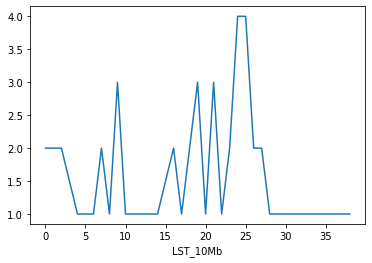

In [177]:
results_inform.groupby('LST_10Mb').size().plot()

<AxesSubplot:xlabel='LST_10Mb', ylabel='Count'>

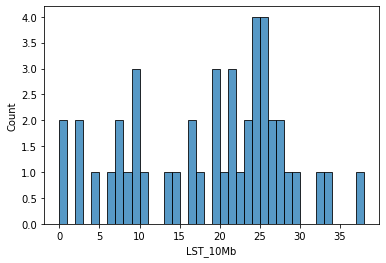

In [178]:
sns.histplot(results_inform['LST_10Mb'], binwidth=1)

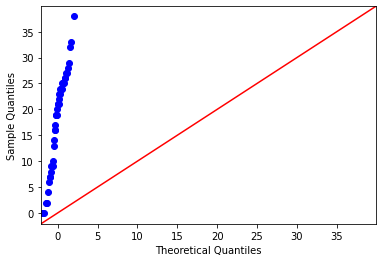

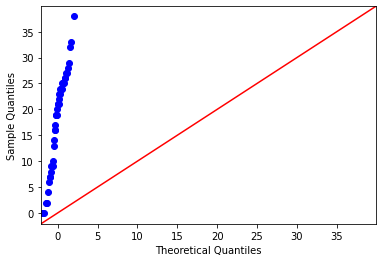

In [179]:
sm.qqplot(results_inform['LST_10Mb'], line='45')

<AxesSubplot:xlabel='LST_10Mb'>

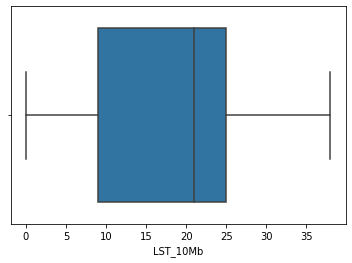

In [180]:
sns.boxplot(x=results_inform['LST_10Mb'])

#### LST 9Mb

In [181]:
results_inform['LST_9Mb'].mean()

21.444444444444443

In [182]:
results_inform['LST_9Mb'].median()

22.0

In [183]:
results_inform['LST_9Mb'].skew()

-0.14932905180948838

In [184]:
results_inform['LST_9Mb'].kurtosis()

-0.5763259198052584

<AxesSubplot:xlabel='LST_9Mb'>

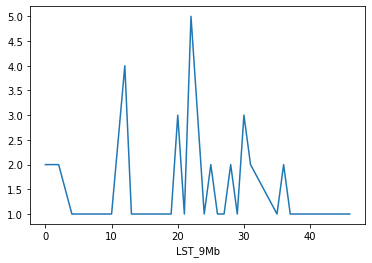

In [185]:
results_inform.groupby('LST_9Mb').size().plot()

<AxesSubplot:xlabel='LST_9Mb', ylabel='Count'>

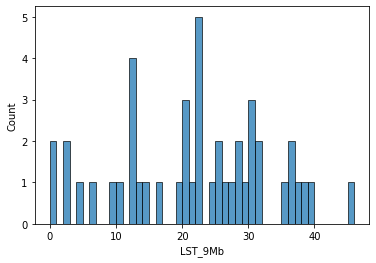

In [186]:
sns.histplot(results_inform['LST_9Mb'], binwidth=1)

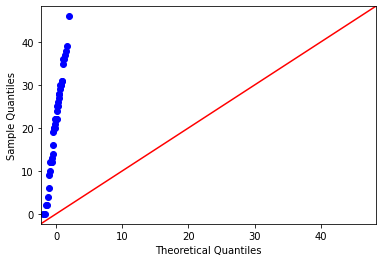

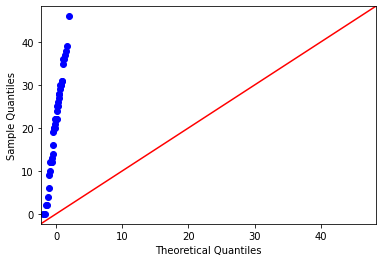

In [187]:
sm.qqplot(results_inform['LST_9Mb'], line='45')

<AxesSubplot:xlabel='LST_9Mb'>

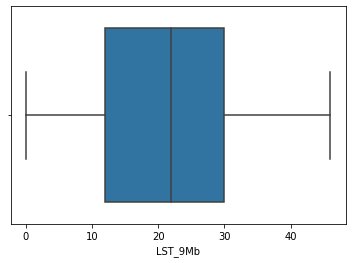

In [188]:
sns.boxplot(x=results_inform['LST_9Mb'])

#### LST 8Mb

In [189]:
results_inform['LST_8Mb'].mean()

25.666666666666668

In [190]:
results_inform['LST_8Mb'].median()

26.0

In [191]:
results_inform['LST_8Mb'].skew()

0.13521736764989384

In [192]:
results_inform['LST_8Mb'].kurtosis()

0.14217976616053818

<AxesSubplot:xlabel='LST_8Mb'>

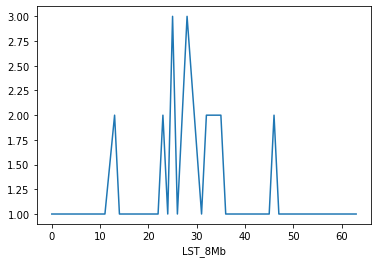

In [193]:
results_inform.groupby('LST_8Mb').size().plot()

<AxesSubplot:xlabel='LST_8Mb', ylabel='Count'>

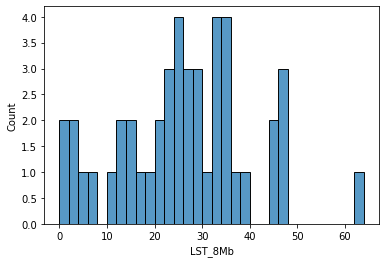

In [194]:
sns.histplot(results_inform['LST_8Mb'], binwidth=2)

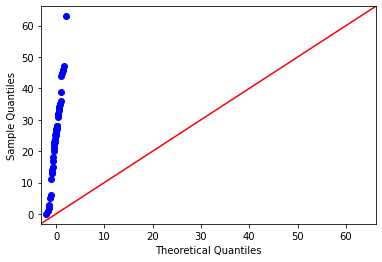

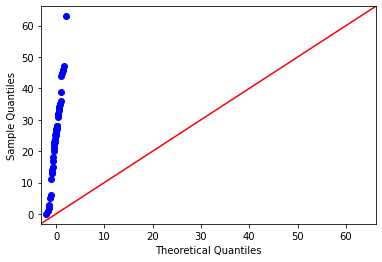

In [195]:
sm.qqplot(results_inform['LST_8Mb'], line='45')

<AxesSubplot:xlabel='LST_8Mb'>

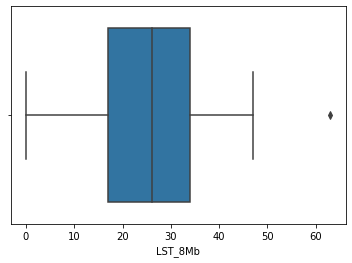

In [196]:
sns.boxplot(x=results_inform['LST_8Mb'])

In [303]:
find_outliers(results_inform, 'LST_8Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63


#### LST 7Mb

In [197]:
results_inform['LST_7Mb'].mean()

30.955555555555556

In [198]:
results_inform['LST_7Mb'].median()

31.0

In [199]:
results_inform['LST_7Mb'].skew()

0.0920722253742113

In [200]:
results_inform['LST_7Mb'].kurtosis()

0.311259995493244

<AxesSubplot:xlabel='LST_7Mb'>

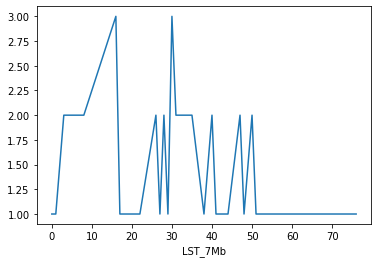

In [201]:
results_inform.groupby('LST_7Mb').size().plot()

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

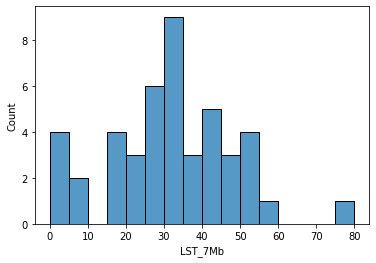

In [202]:
sns.histplot(results_inform['LST_7Mb'], binwidth=5)

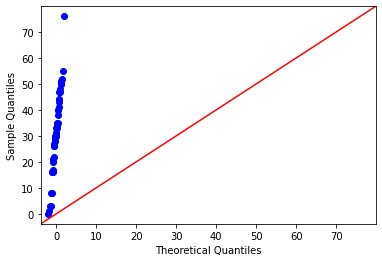

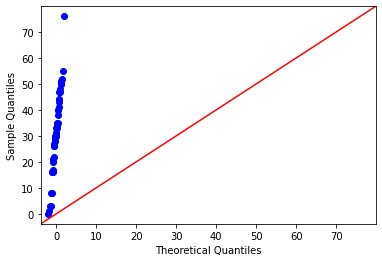

In [203]:
sm.qqplot(results_inform['LST_7Mb'], line='45')

<AxesSubplot:xlabel='LST_7Mb'>

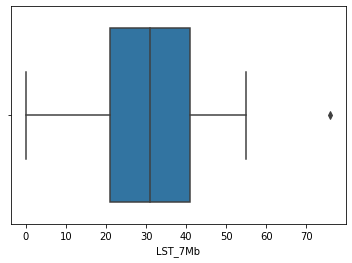

In [204]:
sns.boxplot(x=results_inform['LST_7Mb'])

In [305]:
find_outliers(results_inform, 'LST_7Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63


#### LST 6Mb

In [205]:
results_inform['LST_6Mb'].mean()

36.55555555555556

In [206]:
results_inform['LST_6Mb'].median()

36.0

In [207]:
results_inform['LST_6Mb'].skew()

0.18246033328059166

In [208]:
results_inform['LST_6Mb'].kurtosis()

0.17553782649212257

<AxesSubplot:xlabel='LST_6Mb'>

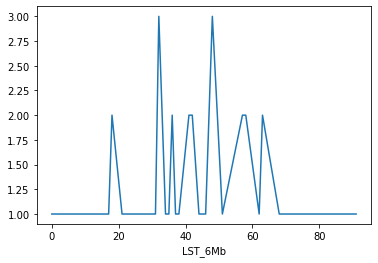

In [209]:
results_inform.groupby('LST_6Mb').size().plot()

<AxesSubplot:xlabel='LST_6Mb', ylabel='Count'>

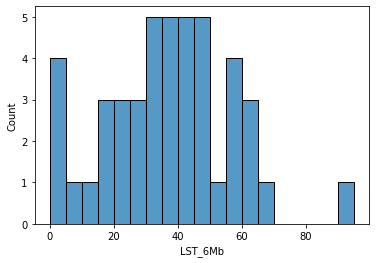

In [210]:
sns.histplot(results_inform['LST_6Mb'], binwidth=5)

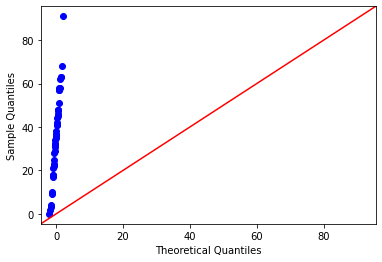

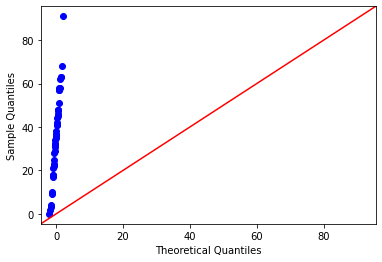

In [211]:
sm.qqplot(results_inform['LST_6Mb'], line='45')

<AxesSubplot:xlabel='LST_6Mb'>

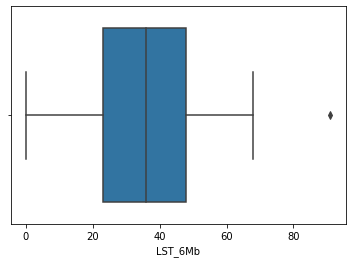

In [212]:
sns.boxplot(x=results_inform['LST_6Mb'])

In [306]:
find_outliers(results_inform, 'LST_6Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63


#### LST 5Mb

In [213]:
results_inform['LST_5Mb'].mean()

45.44444444444444

In [214]:
results_inform['LST_5Mb'].median()

46.0

In [215]:
results_inform['LST_5Mb'].skew()

0.17514448784333642

In [216]:
results_inform['LST_5Mb'].kurtosis()

-0.2534377870937541

<AxesSubplot:xlabel='LST_5Mb'>

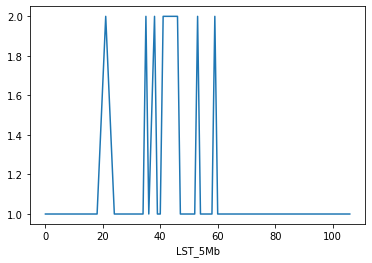

In [217]:
results_inform.groupby('LST_5Mb').size().plot()

<AxesSubplot:xlabel='LST_5Mb', ylabel='Count'>

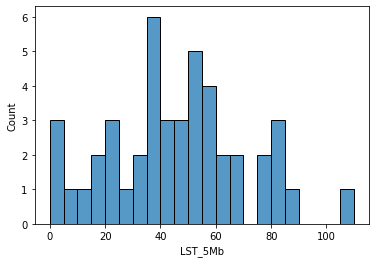

In [218]:
sns.histplot(results_inform['LST_5Mb'], binwidth=5)

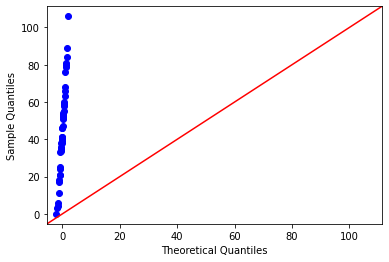

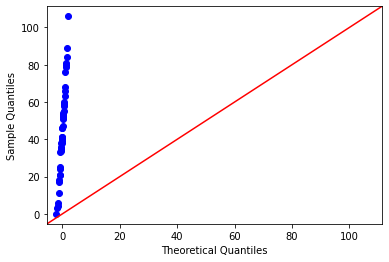

In [219]:
sm.qqplot(results_inform['LST_5Mb'], line='45')

<AxesSubplot:xlabel='LST_5Mb'>

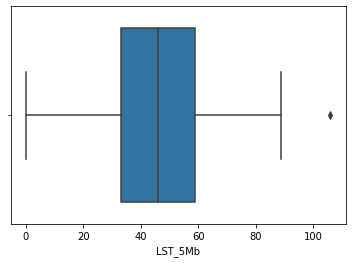

In [220]:
sns.boxplot(x=results_inform['LST_5Mb'])

In [308]:
find_outliers(results_inform, 'LST_5Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63


#### LST 4Mb

In [221]:
results_inform['LST_4Mb'].mean()

57.733333333333334

In [222]:
results_inform['LST_4Mb'].median()

55.0

In [223]:
results_inform['LST_4Mb'].skew()

0.3976774804074022

In [224]:
results_inform['LST_4Mb'].kurtosis()

-0.31759030597236704

<AxesSubplot:xlabel='LST_4Mb'>

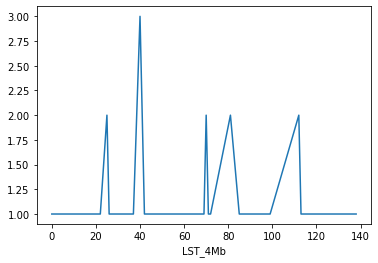

In [225]:
results_inform.groupby('LST_4Mb').size().plot()

<AxesSubplot:xlabel='LST_4Mb', ylabel='Count'>

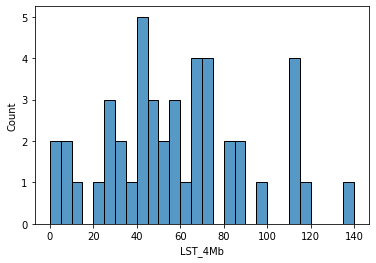

In [226]:
sns.histplot(results_inform['LST_4Mb'], binwidth=5)

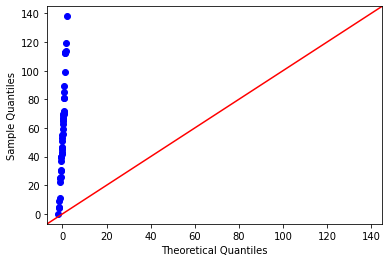

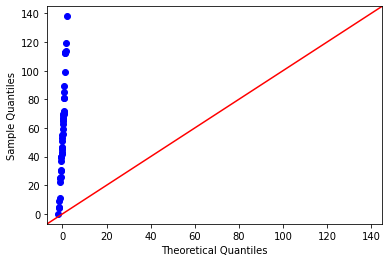

In [227]:
sm.qqplot(results_inform['LST_4Mb'], line='45')

<AxesSubplot:xlabel='LST_4Mb'>

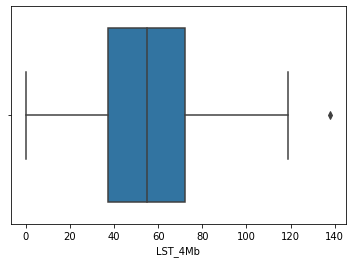

In [228]:
sns.boxplot(x=results_inform['LST_4Mb'])

In [309]:
find_outliers(results_inform, 'LST_4Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63


#### LST 3Mb

In [229]:
results_inform['LST_3Mb'].mean()

76.8

In [230]:
results_inform['LST_3Mb'].median()

78.0

In [231]:
results_inform['LST_3Mb'].skew()

0.4849848809239355

In [232]:
results_inform['LST_3Mb'].kurtosis()

-0.2298475203616679

<AxesSubplot:xlabel='LST_3Mb'>

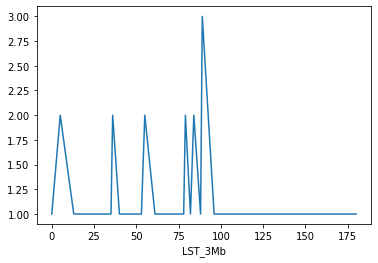

In [233]:
results_inform.groupby('LST_3Mb').size().plot()

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

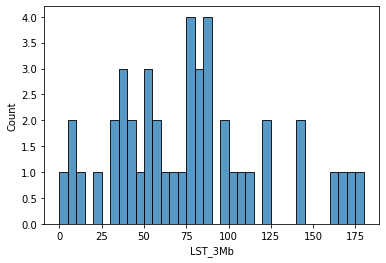

In [234]:
sns.histplot(results_inform['LST_3Mb'], binwidth=5)

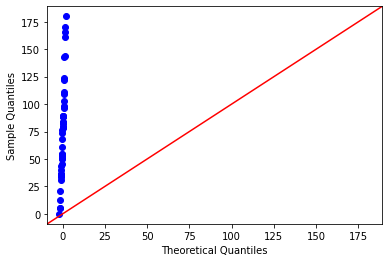

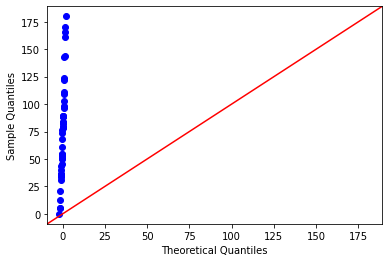

In [235]:
sm.qqplot(results_inform['LST_3Mb'], line='45')

<AxesSubplot:xlabel='LST_3Mb'>

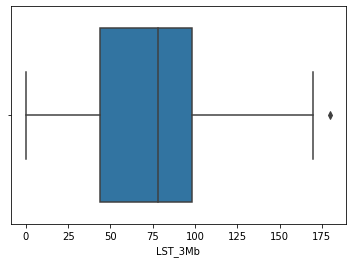

In [236]:
sns.boxplot(x=results_inform['LST_3Mb'])

In [310]:
find_outliers(results_inform, 'LST_3Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63


### HRD

#### HRD s LST_11Mb

In [237]:
results_inform['HRD'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_11Mb']

In [238]:
results_inform['HRD'].mean()

19.133333333333333

In [239]:
results_inform['HRD'].median()

18.0

In [240]:
results_inform['HRD'].skew()

3.318976544459992

In [241]:
results_inform['HRD'].kurtosis()

16.25457622516106

<AxesSubplot:xlabel='HRD'>

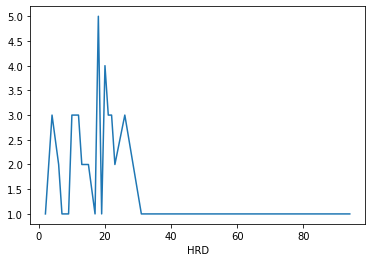

In [242]:
results_inform.groupby('HRD').size().plot()

<AxesSubplot:xlabel='HRD', ylabel='Count'>

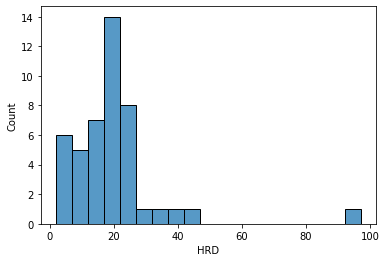

In [243]:
sns.histplot(results_inform['HRD'], binwidth=5)

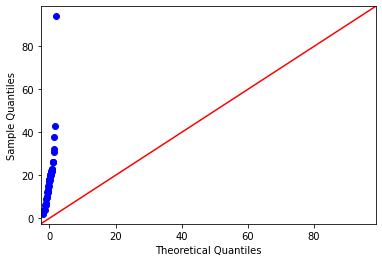

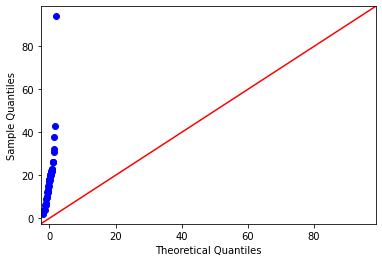

In [244]:
sm.qqplot(results_inform['HRD'], line='45')

<AxesSubplot:xlabel='HRD'>

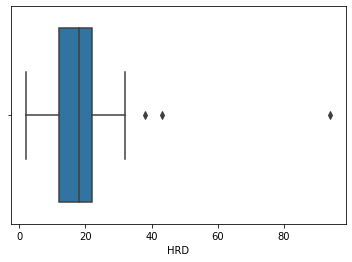

In [245]:
sns.boxplot(x=results_inform['HRD'])

In [311]:
find_outliers(results_inform, 'HRD')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,144,114,79,63,52,47,39,29,23,94,100,110,118
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,84,67,58,51,43,39,36,32,29,38,41,45,48
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,124,85,68,57,51,46,36,25,22,43,46,57,67


#### HRD s LST_10Mb

In [246]:
results_inform['HRD_10'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_10Mb']

In [247]:
results_inform['HRD_10'].mean()

21.8

In [248]:
results_inform['HRD_10'].median()

21.0

In [249]:
results_inform['HRD_10'].skew()

3.0950508639122485

In [250]:
results_inform['HRD_10'].kurtosis()

14.777609606149824

<AxesSubplot:xlabel='HRD_10'>

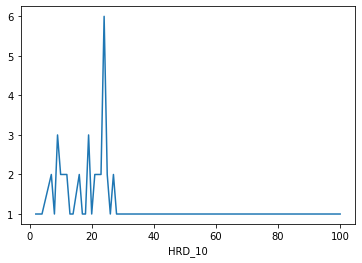

In [251]:
results_inform.groupby('HRD_10').size().plot()

<AxesSubplot:xlabel='HRD_10', ylabel='Count'>

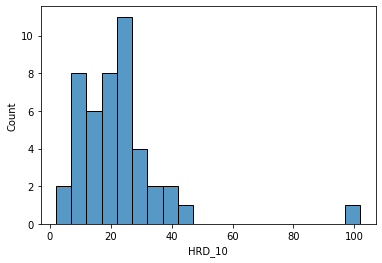

In [252]:
sns.histplot(results_inform['HRD_10'], binwidth=5)

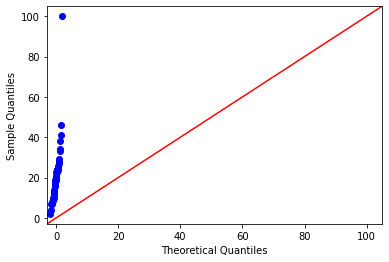

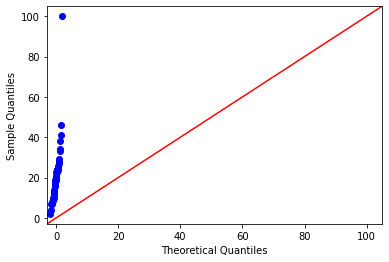

In [253]:
sm.qqplot(results_inform['HRD_10'], line='45')

<AxesSubplot:xlabel='HRD_10'>

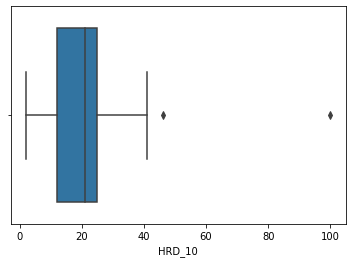

In [254]:
sns.boxplot(x=results_inform['HRD_10'])

In [313]:
find_outliers(results_inform, 'HRD_10')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,144,114,79,63,52,47,39,29,23,94,100,110,118
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,124,85,68,57,51,46,36,25,22,43,46,57,67


#### HRD s LST_9Mb

In [255]:
results_inform['HRD_9'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_9Mb']

In [256]:
results_inform['HRD_9'].mean()

25.044444444444444

In [257]:
results_inform['HRD_9'].median()

22.0

In [258]:
results_inform['HRD_9'].skew()

2.870240582690948

In [259]:
results_inform['HRD_9'].kurtosis()

12.779119641667144

<AxesSubplot:xlabel='HRD_9'>

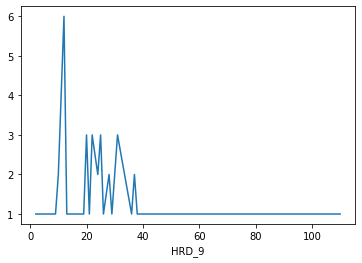

In [260]:
results_inform.groupby('HRD_9').size().plot()

<AxesSubplot:xlabel='HRD_9', ylabel='Count'>

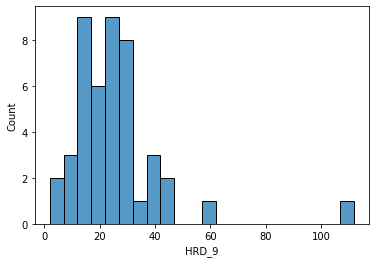

In [261]:
sns.histplot(results_inform['HRD_9'], binwidth=5)

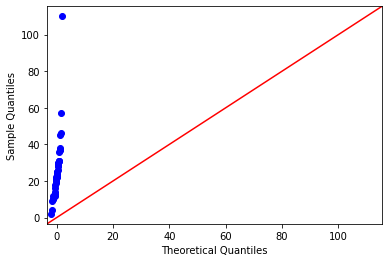

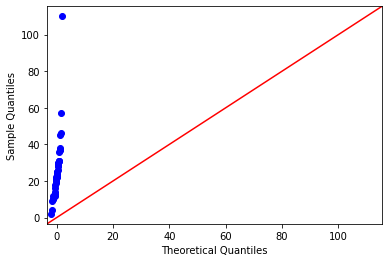

In [262]:
sm.qqplot(results_inform['HRD_9'], line='45')

<AxesSubplot:xlabel='HRD_9'>

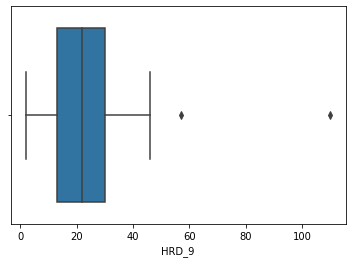

In [263]:
sns.boxplot(x=results_inform['HRD_9'])

In [314]:
find_outliers(results_inform, 'HRD_9')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,144,114,79,63,52,47,39,29,23,94,100,110,118
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,124,85,68,57,51,46,36,25,22,43,46,57,67


#### HRD s LST_8Mb

In [264]:
results_inform['HRD_8'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_8Mb']

In [265]:
results_inform['HRD_8'].mean()

29.266666666666666

In [266]:
results_inform['HRD_8'].median()

27.0

In [267]:
results_inform['HRD_8'].skew()

2.491355064707049

In [268]:
results_inform['HRD_8'].kurtosis()

9.838804055218942

<AxesSubplot:xlabel='HRD_8'>

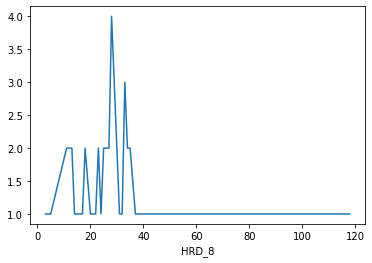

In [269]:
results_inform.groupby('HRD_8').size().plot()

<AxesSubplot:xlabel='HRD_8', ylabel='Count'>

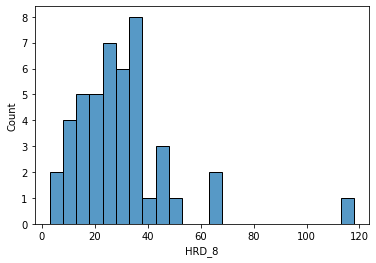

In [270]:
sns.histplot(results_inform['HRD_8'], binwidth=5)

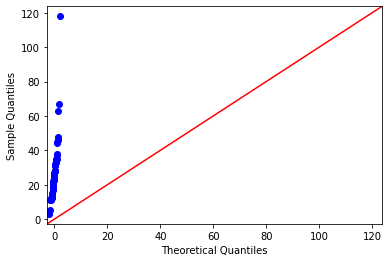

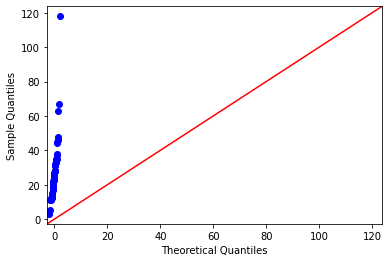

In [271]:
sm.qqplot(results_inform['HRD_8'], line='45')

<AxesSubplot:xlabel='HRD_8'>

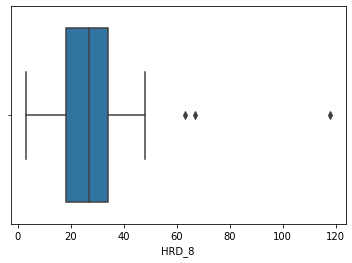

In [272]:
sns.boxplot(x=results_inform['HRD_8'])

In [315]:
find_outliers(results_inform, 'HRD_8')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD,HRD_10,HRD_9,HRD_8
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,144,114,79,63,52,47,39,29,23,94,100,110,118
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,124,85,68,57,51,46,36,25,22,43,46,57,67


### Párová analýza atribútov

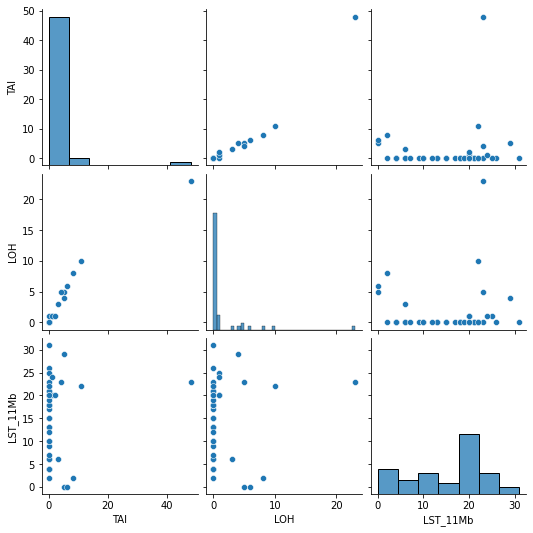

In [273]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_11Mb']])

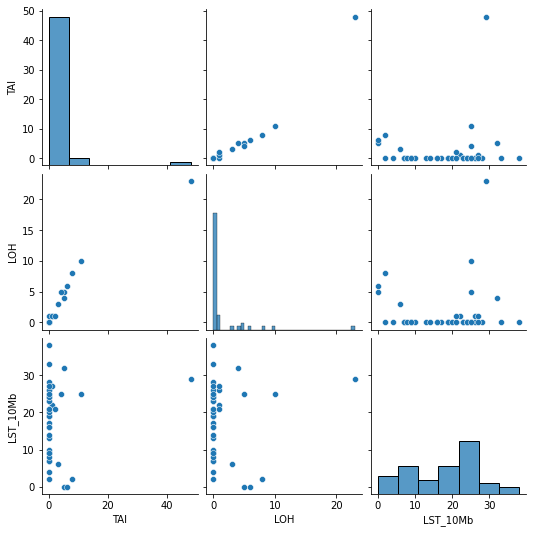

In [274]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_10Mb']])

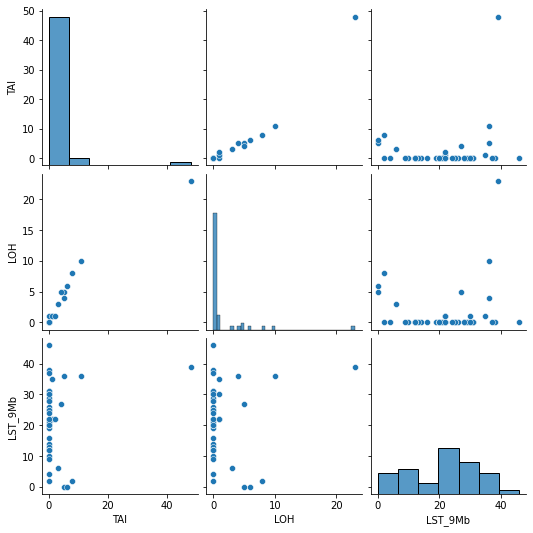

In [275]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_9Mb']])

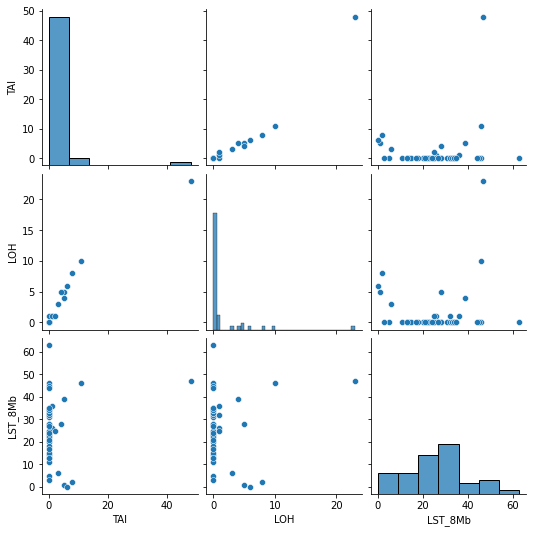

In [276]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_8Mb']])

<AxesSubplot:>

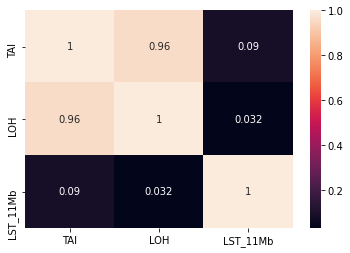

In [277]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_11Mb']].corr(), annot=True)

<AxesSubplot:>

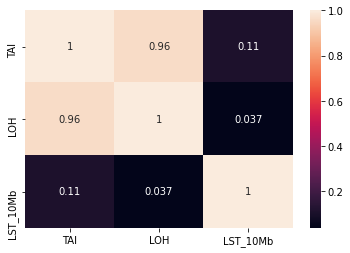

In [278]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_10Mb']].corr(), annot=True)

<AxesSubplot:>

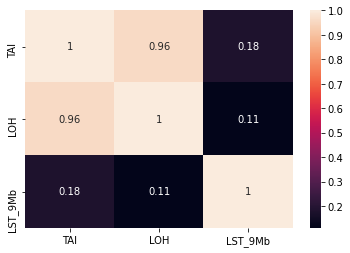

In [279]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_9Mb']].corr(), annot=True)

<AxesSubplot:>

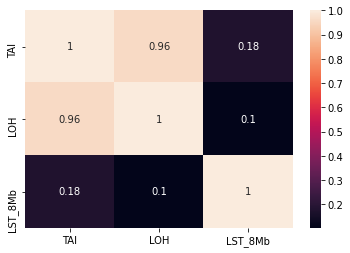

In [280]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_8Mb']].corr(), annot=True)